This notebook contains the processes used in cleaning and preparing the dataset for further analysis.

# Part I
This part includes initial exploration of the dataset, creating functions to filter, merge variables, clean columns and create a consolidated dataset for selected years.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer

In [2]:
#Review of 2017 dataset to explore the features of the dataset.
#This exploration consequently guides the creation of functions to automate processes.

variables_2017 = pd.read_csv("Data from IPEDS\\2017\\2017 variables.csv")
variables_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Columns: 106 entries, unitid to DRVHR2017_RV.Instructional FTE
dtypes: float64(85), int64(2), object(19)
memory usage: 2.0+ MB


In [3]:
#For 2017 there are 119 columns and 2520 entries as universities
#There is no certainty that all entries are universities hence some specific columns are used as filters to select
#actual universities for further cleaning and analysis.

print(f"there are {variables_2017.shape[0]} entries/rows")
print(f"there are {variables_2017.shape[1]} variables")

there are 2520 entries/rows
there are 106 variables


In [4]:
variables_2017.head(3) #a view of 3 universities and some variables

,unitid,institution name,year,HD2017.Level of institution,HD2017.Control of institution,HD2017.Undergraduate offering,HD2017.Degree-granting status,HD2017.Longitude location of institution,HD2017.Latitude location of institution,HD2017.Date institution closed,...,DRVF2017_RV.Institutional support expenses per FTE (for-profit institutions),DRVF2017_RV.All other core expenses per FTE (for-profit institutions),IC2017.Institution provide on-campus housing,IC2017.Total dormitory capacity,IC2017_AY.In-district average tuition for full-time undergraduates,IC2017_AY.In-state average tuition for full-time undergraduates,IC2017_AY.Out-of-state average tuition for full-time undergraduates,HD2017.Bureau of Economic Analysis (BEA) regions,HD2017.Degree of urbanization (Urban-centric locale),DRVHR2017_RV.Instructional FTE
0,100654,Alabama A & M University,2017,Four or more years,Public,Undergraduate degree or certificate offering,Degree-granting,-86.568502,34.783368,-2.0,...,NaN,NaN,Yes,2614.0,8379.0,8379.0,16758.0,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",City: Midsize,292.0
1,100663,University of Alabama at Birmingham,2017,Four or more years,Public,Undergraduate degree or certificate offering,Degree-granting,-86.799345,33.505697,-2.0,...,NaN,NaN,Yes,2785.0,8328.0,8328.0,19032.0,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",City: Midsize,2412.0
2,100690,Amridge University,2017,Four or more years,Private not-for-profit,Undergraduate degree or certificate offering,Degree-granting,-86.174010,32.362609,-2.0,...,NaN,NaN,No,NaN,9000.0,9000.0,9000.0,"Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC,...",City: Midsize,33.0


## 1. Filtering to select Universities relevant for project
#### The filtering is based on the selection of specific features that qualify an institution/university for this study.

##### 1.1 HDYEAR.Institutional category - should be Degree-granting, baccalaureate or above

In [5]:
variables_2017['HD2017.Institutional category'].value_counts()

Degree-granting, primarily baccalaureate or above          1902
Degree-granting, not primarily baccalaureate or above       330
Degree-granting, associate's and certificates               121
Not applicable                                               50
Degree-granting, graduate with no undergraduate degrees       9
Nondegree-granting, sub-baccalaureate                         3
Not reported                                                  2
Nondegree-granting, above the baccalaureate                   1
Name: HD2017.Institutional category, dtype: int64

#### The above shows the different categories of institutions. For this analysis, the focus is on institutions that are degree-granting (baccalaureate or above). These are the first 2 categories below.

1) Degree-granting, primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree,Doctor's degree or a First-professional degree. Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded is greater than 50 percent. 

2) Degree-granting, not primarily baccalaureate or above - These institutions offer a Bachelor's degree, Master's degree, Doctor's degree,or a First-professional degree. Also, the total number of degrees/certificates at or above the bachelor's level awarded divided by the total number of degrees/certificates awarded must be less than or equal to 50 percent.

----------------------------------------------------------------------------------------------------------------------

3) Degree-granting, Associate's and certificates - Institutions offer an Associate's degree and may offer other postsecondary certificates, awards or diplomas of less than one academic year; at least one but less-than two academic years; at least two but less-than four academic years. This category also includes institutions that offer a postbaccalaureate certificate, Post-master's certificate or a First-professional certificate and the highest degree offered is an Associate's degree. 

4) Degree-granting, graduate with no undergraduate degrees - These institutions offer a Master's degree, Doctor's degree or a First-professional degree and do not offer a Bachelor's degree or an Associate's degree.

5) Nondegree-granting, sub-baccalaureate - Institutions do not offer Associate's, Bachelor's , Master's, Doctor's, or First-professional degrees, or certificates above the baccalaureate level. They do offer postsecondary certificates, awards or diplomas of less than one academic year; at least one but less than two academic years; or at least two but less than four academic years.


6) Nondegree-granting, above the baccalaureate - Institutions do not offer Associate's, Bachelor's, Master's, Doctor's or First-professional degrees, but offer either Postbaccaulaureate, Post-master's or First-professional certificates. 



In [6]:
#Filtering Degree granting institutions only
variables_2017 = variables_2017[(variables_2017['HD2017.Institutional category'] == "Degree-granting, primarily baccalaureate or above") |
                                (variables_2017['HD2017.Institutional category'] == "Degree-granting, not primarily baccalaureate or above")].copy()

print(f"There are now {variables_2017.shape[0]} institutions")

There are now 2232 institutions


##### 1.2 HD2017.Level of institution - should be 4 years or more

A classification of whether an institution’s programs are 4-year or higher (4 year), 2-but-less-than 4-year (2 year), or less than 2-year. The focus of this study is on 'undergraduates' hence the universities are filtered based on 4-year or higher (4 year) values. 

In [7]:
variables_2017["HD2017.Level of institution"].value_counts() 

Four or more years    2232
Name: HD2017.Level of institution, dtype: int64

After filtering Institutional category for Degree-granting (baccalaureate or above), the level of institutions to select is Four or more years, which is what is required for 'undergraduates' 

In [8]:
variables_2017 = variables_2017[variables_2017["HD2017.Level of institution"]=="Four or more years"].copy()

In [9]:
print(f"There are now {variables_2017.shape[0]} universities")

There are now 2232 universities


##### 1.3 HDYEAR.Control of institution should not contain blanks

A classification of whether an institution is operated by publicly elected or appointed officials or by privately elected or appointed officials and derives its major source of funds from private sources.

In [10]:
#check the various types of control  
variables_2017["HD2017.Control of institution"].value_counts()

#there are only 3 types of control present in the dataset

Private not-for-profit    1286
Public                     728
Private for-profit         218
Name: HD2017.Control of institution, dtype: int64

In [11]:
#Select Public, Private not-for-profit, and Private for-profit.
variables_2017 = variables_2017[(variables_2017['HD2017.Control of institution'] == "Private not-for-profit") |
                                (variables_2017['HD2017.Control of institution'] == "Public")|
                                (variables_2017['HD2017.Control of institution'] == "Private for-profit")].copy()

print(f"There are now {variables_2017.shape[0]} universities")

There are now 2232 universities


In [12]:
#check if there are blanks or missing values
variables_2017["HD2017.Control of institution"].isna().sum()

0

##### 1.4 HDYEAR.Undergraduate offering should be Undergraduate degree or certificate offering


In [13]:
#Confirm that the universities offer Undergraduate degree or certificate offering
variables_2017["HD2017.Undergraduate offering"].value_counts()

Undergraduate degree or certificate offering    2232
Name: HD2017.Undergraduate offering, dtype: int64

In [14]:
#Select Undergraduate degree or certificate offering. This will be used in a function that will be used 
#to filter the dataset for other years
variables_2017 = variables_2017[variables_2017["HD2017.Undergraduate offering"]=="Undergraduate degree or certificate offering"].copy()
print(f"There are now {variables_2017.shape[0]} universities")

There are now 2232 universities


##### 1.5 HDYEAR.Degree-granting status should be Degree-granting


In [15]:
#Confirm that the universities offer Degree-granting status
variables_2017["HD2017.Degree-granting status"].value_counts()

Degree-granting    2232
Name: HD2017.Degree-granting status, dtype: int64

In [16]:
#Select Degree-granting status. 
variables_2017 = variables_2017[variables_2017["HD2017.Degree-granting status"]=="Degree-granting"].copy()
print(f"There are now {variables_2017.shape[0]} universities")

There are now 2232 universities


##### 1.6 ICYEAR.Academic should be Yes

Academic, leading to a certificate, degree, or diploma ACADEMIC PROGRAM - Instructional program leading toward an associate's, bachelor's, master's, doctor's, or first-professional degree or resulting in credits that can be applied to one of these degrees.

In [17]:
#check if university's program is academic 
variables_2017["IC2017.Academic"].value_counts()

Yes           2227
Implied no       5
Name: IC2017.Academic, dtype: int64

In [18]:
#filter dataset to select universities that offer academic programs
variables_2017 = variables_2017[variables_2017["IC2017.Academic"]=="Yes"].copy()
variables_2017["IC2017.Academic"].value_counts()

Yes    2227
Name: IC2017.Academic, dtype: int64

In [19]:
print(f"There are now {variables_2017.shape[0]} institutions")

There are now 2227 institutions


##### 1.7 HDYEAR.Date institution closed should be -2


Date institution closed. If institution is closed then institution will report date of closure in the format: mmddyyyy.

Else if university has not closed down, then the code should be -2

In [20]:
variables_2017["HD2017.Date institution closed"].value_counts() #all institutions have not closed now

-2.0    2227
Name: HD2017.Date institution closed, dtype: int64

In [21]:
#filter dataset to select universities that are not closed down
variables_2017 = variables_2017[variables_2017["HD2017.Date institution closed"]==-2].copy()
variables_2017["HD2017.Date institution closed"].value_counts()

-2.0    2227
Name: HD2017.Date institution closed, dtype: int64

##### 1.8 HDYEAR.Institution is active in current year should be Yes

A code to indicate whether the institution is active in current year; where active is Yes

In [22]:
variables_2017["HD2017.Institution is active in current year"].value_counts() 

Yes    2227
Name: HD2017.Institution is active in current year, dtype: int64

In [23]:
#filter dataset to select universities that are active
variables_2017 = variables_2017[variables_2017["HD2017.Institution is active in current year"]=="Yes"].copy()
variables_2017["HD2017.Institution is active in current year"].value_counts()

Yes    2227
Name: HD2017.Institution is active in current year, dtype: int64

#### Summary: A function to filter universities that are relevant for this analysis is created in section 5

## 2. A sum of multiple variables to ascertain one feature.

Due to the different types of control of institutions, some variables for the universities are recorded only for the corresponding control for that institution. 

For example; Revenue from tuition and fees is captured under different types of control. 
A public institution will have revenue from tuition and fees under the *Revenues from tuition and fees per FTE (GASB)* column, leaving the other columns (for private and private-not-for-profit institutions) blank or with missing values. 

A summation across all the revenue columns of the different types of control will resolve this issue by creating a new variable capturing revenue from tuition and fees (regardless of type of control of intitutuon)

In [24]:
variables_2017[["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", #Public uni's
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", #Private not-for profit uni's
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" #Private for profit uni's
               ]].tail(10)


,unitid,institution name,HD2017.Control of institution,DRVF2017_RV.Revenues from tuition and fees per FTE (GASB),DRVF2017_RV.Revenues from tuition and fees per FTE (FASB),DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)
2416,490230,Reformed University,Private not-for-profit,NaN,0.0,NaN
2417,490276,Yeshiva Shaar Ephraim,Private for-profit,NaN,NaN,7770.0
2419,490319,Yeshiva Bais Aharon,Private not-for-profit,NaN,8890.0,NaN
2420,490328,Mechon L'hoyroa,Private not-for-profit,NaN,3193.0,NaN
2421,490504,Yeshiva Ohr Naftoli,Private not-for-profit,NaN,18729.0,NaN
2422,490513,Bais Medrash Mayan Hatorah,Private not-for-profit,NaN,4976.0,NaN
2423,490805,Purdue University Northwest,Public,6689.0,NaN,NaN
2424,490878,Platt College-Anaheim,Private for-profit,NaN,NaN,1604.0
2425,491057,Yeshiva Kollel Tifereth Elizer,Private not-for-profit,NaN,5967.0,NaN
2427,491288,University of Wisconsin-Milwaukee Flex,Public,4343.0,NaN,NaN


From the last 10 datapoints above: 
1) Public uni's have values under Revenues from tuition and fees per FTE (GASB). (But there could be values reported using FASB)
2) Private not-for profit uni's have values under Revenues from tuition and fees per FTE (FASB)
3) Private for profit uni's have values under Revenues from tuition and fees per FTE (for-profit institutions)

#### 2.1 For public institutions 

CHECK: To double check if the Revenue column reports only for the corresponding control of institution, I filtered all public institutions and checked if the other columns have no values, meaning only one column reports values for an institution.

Note: For this dataset
1. It is also worth noting that for Public institutions, values could be reported using either GASB or FASB standards. 
2. For Private not-for-profit institutions, values are recorded under FASB only.

In [25]:
#actual distribution of control of institutions
variables_2017["HD2017.Control of institution"].value_counts()

Private not-for-profit    1286
Public                     728
Private for-profit         213
Name: HD2017.Control of institution, dtype: int64

In [26]:
variables_2017.loc[variables_2017["HD2017.Control of institution"]=="Public",
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]].isna().sum()

unitid                                                                            0
institution name                                                                  0
HD2017.Control of institution                                                     0
DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)                        30
DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)                       698
DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)    728
dtype: int64

This breakdown of missing values above indicates that for the missing values under GASB, it is possible that these Public  institutions used the FASB standard. 

The breakdown of the distribution of control of institution below proves that only 1 column records a value for an institution. This is so because 728 missing values are expected for (for-profit institutions) and (Private not-for-profit) and the total number of public institutions are 728 (same number of expected reported revenue for public inst). 
Although there are 30 missing values for public institutions, these were recorded using FASB standards so they do not fall under GASB. If these 30 values were recorded under GASB, there would be 728 missing values for Private not-for-profit and Private for-profit institutions each.

In [27]:
variables_2017.loc[(variables_2017["HD2017.Control of institution"]=="Public") & 
                   (variables_2017["DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)"].isna()),
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]]

,unitid,institution name,HD2017.Control of institution,DRVF2017_RV.Revenues from tuition and fees per FTE (GASB),DRVF2017_RV.Revenues from tuition and fees per FTE (FASB),DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)
276,130943,University of Delaware,Public,NaN,19072.0,NaN
746,165884,Benjamin Franklin Cummings Institute of Techno...,Public,NaN,9254.0,NaN
1507,213598,Lincoln University,Public,NaN,10348.0,NaN
1521,214591,Pennsylvania State University-Penn State Erie-...,Public,NaN,6999.0,NaN
1522,214625,Pennsylvania State University-Penn State New K...,Public,NaN,6938.0,NaN
1523,214634,Pennsylvania State University-Penn State Shenango,Public,NaN,8683.0,NaN
1524,214643,Pennsylvania State University-Penn State Wilke...,Public,NaN,7560.0,NaN
1525,214652,Pennsylvania State University-Penn State Scranton,Public,NaN,5828.0,NaN
1527,214670,Pennsylvania State University-Penn State Lehig...,Public,NaN,6226.0,NaN
1528,214689,Pennsylvania State University-Penn State Altoona,Public,NaN,6443.0,NaN


The data above proves that some institutions used FASB standards and most importantly only one column reports a value for an institution.

#### 2.2 For private not-for profit institutions 

In [28]:
variables_2017.loc[variables_2017["HD2017.Control of institution"]=="Private not-for-profit",
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]].isna().sum()

unitid                                                                             0
institution name                                                                   0
HD2017.Control of institution                                                      0
DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)                       1286
DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)                          4
DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)    1286
dtype: int64

There are 4 missing values for FASB. 
Filtering is performed below to identify the issue.

In [29]:
#filtering based on Private not-for-profit institutions AND missing values in the FASB column

variables_2017.loc[(variables_2017["HD2017.Control of institution"]=="Private not-for-profit") & 
                   (variables_2017["DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)"].isna()),
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]]

,unitid,institution name,HD2017.Control of institution,DRVF2017_RV.Revenues from tuition and fees per FTE (GASB),DRVF2017_RV.Revenues from tuition and fees per FTE (FASB),DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)
2048,262165,Montana Bible College,Private not-for-profit,NaN,NaN,NaN
2146,440396,New Saint Andrews College,Private not-for-profit,NaN,NaN,NaN
2362,484844,Minerva University,Private not-for-profit,NaN,NaN,NaN
2404,488785,University of Saint Katherine,Private not-for-profit,NaN,NaN,NaN


The above indicates that there are instances where some institutions do not have values reported for Revenue.
However, most importantly, only one column reports one value for an institution.

#### 2.3 For private for profit institutions 

In [30]:
variables_2017.loc[variables_2017["HD2017.Control of institution"]=="Private for-profit",
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]].isna().sum()

unitid                                                                            0
institution name                                                                  0
HD2017.Control of institution                                                     0
DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)                       213
DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)                       213
DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)      1
dtype: int64

It is worth noting that there are 213 for-profit institutions in the dataset so having 213 missing values for public and private not-for profit indicates that only one feature was recorded for an institution under the three revenue variables stated above.

In [31]:
#filter based on Private for-profit institutions AND missing values in the 
#Revenues from tuition and fees per FTE (for-profit institutions) column

variables_2017.loc[(variables_2017["HD2017.Control of institution"]=="Private for-profit") & 
                (variables_2017["DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)"].isna()),
                  ["unitid", 
                "institution name", 
                "HD2017.Control of institution",
                "DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", 
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" 
               ]]

,unitid,institution name,HD2017.Control of institution,DRVF2017_RV.Revenues from tuition and fees per FTE (GASB),DRVF2017_RV.Revenues from tuition and fees per FTE (FASB),DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)
2216,449889,American College of Education,Private for-profit,NaN,NaN,NaN


The above indicates that there are instances where some institutions do not have values reported for revenue.
However, most importantly, only one column reports values for an institution.

#### 2.4 Bottom line: 
For similar variables that follow this pattern, a function is created to sum variables across the columns to create a single feature. this will help reduce dimensionality of the data and eliminate missing values that should have been 0.

In [32]:
variables_2017[["DRVF2017_RV.Revenues from tuition and fees per FTE (GASB)", #Public uni's
                "DRVF2017_RV.Revenues from tuition and fees per FTE (FASB)", #Private not-for profit uni's
                "DRVF2017_RV.Revenues from tuition and fees per FTE (for-profit institutions)" #Private for profit uni's
               ]].sum(axis=1) #sum across columns


0        9227.0
1       11612.0
2       14738.0
3        8727.0
4        9003.0
         ...   
2422     4976.0
2423     6689.0
2424     1604.0
2425     5967.0
2427     4343.0
Length: 2227, dtype: float64

This summation is completed for these variables in the function in section 5:
1. Revenues from tuition and fees per FTE
2. Revenues from government grants and contracts per FTE
3. Other core revenues per FTE
4. All other core expenses per FTE
5. For years 2014 up to 2017, Academic support expenses per FTE, Student service expenses per FTE, and Institutional support expenses per FTE will be added to form a single variable called *Academic and institutional support, and student services expense per FTE.* --> This is because for years 2013 and 2014, universities reported these variables as a single unit and not separate as done for 2014 up to 2017. 


In [33]:
variables_2017[["DRVF2017_RV.Academic support expenses per FTE (GASB)",
               "DRVF2017_RV.Student service expenses per FTE (GASB)",
               "DRVF2017_RV.Institutional support expenses per FTE (GASB)",
                
               "DRVF2017_RV.Academic support expenses per FTE (FASB)",
               "DRVF2017_RV.Student service expenses per FTE (FASB)",
               "DRVF2017_RV.Institutional support expenses per FTE (FASB)",
                
               "DRVF2017_RV.Academic support expenses per FTE (for-profit institutions)",
               "DRVF2017_RV.Student service expenses per FTE (for-profit institutions)",
               "DRVF2017_RV.Institutional support expenses per FTE (for-profit institutions)"]]

,DRVF2017_RV.Academic support expenses per FTE (GASB),DRVF2017_RV.Student service expenses per FTE (GASB),DRVF2017_RV.Institutional support expenses per FTE (GASB),DRVF2017_RV.Academic support expenses per FTE (FASB),DRVF2017_RV.Student service expenses per FTE (FASB),DRVF2017_RV.Institutional support expenses per FTE (FASB),DRVF2017_RV.Academic support expenses per FTE (for-profit institutions),DRVF2017_RV.Student service expenses per FTE (for-profit institutions),DRVF2017_RV.Institutional support expenses per FTE (for-profit institutions)
0,1534.0,4076.0,5349.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10368.0,2790.0,7881.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,956.0,1723.0,8541.0,NaN,NaN,NaN
3,1872.0,2937.0,3473.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2402.0,3408.0,6464.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2422,NaN,NaN,NaN,1634.0,3403.0,2779.0,NaN,NaN,NaN
2423,753.0,1843.0,2738.0,NaN,NaN,NaN,NaN,NaN,NaN
2424,NaN,NaN,NaN,NaN,NaN,NaN,425.0,726.0,6053.0
2425,NaN,NaN,NaN,778.0,4324.0,5778.0,NaN,NaN,NaN


A function that sums up various variables to form a single feature is created in section 5

## 3. Student financial aid variables
These are additional variables that had to be downloaded separately, hence these will need to be linked to the main dataset. The dataset is available separately for each year.

#### 3.1 SFA dataset

In [34]:
#load Student Financial Aid (SFA) variables 2017-2018 
sfa_17_18 = pd.read_csv("Data from IPEDS\\2017\\SFA2017.csv")
sfa_17_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 11 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   unitid                                                                                                                      2520 non-null   int64  
 1   institution name                                                                                                            2520 non-null   object 
 2   year                                                                                                                        2520 non-null   int64  
 3   SFA1718_RV.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort           

In [35]:
#merge SFA and main variables dataset for 2017 cohort
variables_2017.merge(sfa_17_18.drop('year',axis=1), on=["unitid","institution name",]).head(3)

,unitid,institution name,year,HD2017.Level of institution,HD2017.Control of institution,HD2017.Undergraduate offering,HD2017.Degree-granting status,HD2017.Longitude location of institution,HD2017.Latitude location of institution,HD2017.Date institution closed,...,HD2017.Degree of urbanization (Urban-centric locale),DRVHR2017_RV.Instructional FTE,SFA1718_RV.Total number of full-time first-time degree/certificate seeking undergraduates - financial aid cohort,SFA1718_RV.Percent of full-time first-time undergraduates awarded any financial aid,"SFA1718_RV.Number of full-time first-time undergraduates awarded federal, state, local or institutional grant aid","SFA1718_RV.Total amount of federal, state, local or institutional grant aid awarded to full-time first-time undergraduates","SFA1718_RV.Average amount of federal, state, local or institutional grant aid awarded",SFA1718_RV.Number of full-time first-time undergraduates awarded student loans,SFA1718_RV.Total amount of student loans awarded to full-time first-time undergraduates,SFA1718_RV.Average amount of student loans awarded to full-time first-time undergraduates
0,100654,Alabama A & M University,2017,Four or more years,Public,Undergraduate degree or certificate offering,Degree-granting,-86.568502,34.783368,-2.0,...,City: Midsize,292.0,1288.0,91.0,1172.0,12264163.0,10464.0,922.0,5925868.0,6427.0
1,100663,University of Alabama at Birmingham,2017,Four or more years,Public,Undergraduate degree or certificate offering,Degree-granting,-86.799345,33.505697,-2.0,...,City: Midsize,2412.0,2228.0,94.0,1955.0,18328113.0,9375.0,1217.0,8524367.0,7004.0
2,100690,Amridge University,2017,Four or more years,Private not-for-profit,Undergraduate degree or certificate offering,Degree-granting,-86.174010,32.362609,-2.0,...,City: Midsize,33.0,5.0,100.0,5.0,22878.0,4576.0,5.0,21749.0,4350.0


#### Summary: A function to automate the merge is created in section 5.

## 4. Graduation Rate and Adjusted Cohort Numbers

#### 4.1 Graduation for 2017 cohort
4-year graduation rate of the subcohort of full-time, first-time students seeking a bachelor's or equivalent degree - 2017 Bachelors subcohort (4-year institutions) This rate is calculated as the total number of students completing a bachelor degree or equivalent within 4-years (100% of normal time) divided by the revised bachelor subcohort minus any allowable exclusions. 

In [36]:
#2017 graduation dataset to create functions as basis for other years
grad_rate_2017_main = pd.read_csv("Data from IPEDS\\GRAD RATE 2017\\Graduation rate 2017.csv")
grad_rate_2017_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 4 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   unitid                                                             2520 non-null   int64  
 1   institution name                                                   2520 non-null   object 
 2   year                                                               2520 non-null   int64  
 3   DRVGR2023.Graduation rate - Bachelor degree within 4 years, total  2004 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 78.9+ KB


In [37]:
#load data for exploration
grad_rate_2017 = grad_rate_2017_main.copy()
grad_rate_2017.head()

,unitid,institution name,year,"DRVGR2023.Graduation rate - Bachelor degree within 4 years, total"
0,100654,Alabama A & M University,2023,15.0
1,100663,University of Alabama at Birmingham,2023,43.0
2,100690,Amridge University,2023,40.0
3,100706,University of Alabama in Huntsville,2023,41.0
4,100724,Alabama State University,2023,13.0


The YEAR shown (2023) above is the 150% of normal time (2017) for completion however the data for graduation rates are for 100% of normal time for completion (which is graduation rates for 2017 cohort, finishing in 2021).
FYI: This is how IPEDS reports the graduation rates.

To double check, I calculated the graduation rates using the total number of completions divided by revised bachelor subcohort minus any allowable exclusions; where allowable exclusions is those students who may be removed (deleted) from the GRS cohort according to the Student Right-to-Know legislation. These include students who died or were totally and permanently disabled; those who left school to serve in the armed forces; those who left to serve with a foreign aid service of the federal government, such as the Peace Corps; and those who left to serve on official church mission.


This calculation can be found below.

#### 4.2 Adjusted Cohort and Completions
Graduation rate data, 150% of normal time to complete - cohort year 2017 (4-year) institutions

In [38]:
#2017 Adjusted Cohort and Completions to create functions as basis for other years
adjusted_cohort_2017 = pd.read_csv("Data from IPEDS\\GRAD RATE 2017\\Adjusted Cohort 2017.csv")
adjusted_cohort_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3853 entries, 0 to 3852
Data columns (total 16 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   unitid                                                     3853 non-null   int64 
 1   institution name                                           3853 non-null   object
 2   year                                                       3853 non-null   int64 
 3   GR2017.Cohort data                                         3853 non-null   object
 4   GR2017_RV.Grand total                                      3853 non-null   int64 
 5   GR2017_RV.Total men                                        3853 non-null   int64 
 6   GR2017_RV.Total women                                      3853 non-null   int64 
 7   GR2017_RV.American Indian or Alaska Native total           3853 non-null   int64 
 8   GR2017_RV.Asian to

In [39]:
#load data to explore
#adjusted_cohort_2017 = adjusted_cohort_2017_main.drop('IDX_GR', axis=1).copy()
adjusted_cohort_2017.head(6)

,unitid,institution name,year,GR2017.Cohort data,GR2017_RV.Grand total,GR2017_RV.Total men,GR2017_RV.Total women,GR2017_RV.American Indian or Alaska Native total,GR2017_RV.Asian total,GR2017_RV.Black or African American total,GR2017_RV.Hispanic total,GR2017_RV.Native Hawaiian or Other Pacific Islander total,GR2017_RV.White total,GR2017_RV.Two or more races total,GR2017_RV.Race/ethnicity unknown total,GR2017_RV.Nonresident alien total
0,100654,Alabama A & M University,2017,Bachelor's or equiv subcohort (4-yr institutio...,1284,513,771,2,2,1156,13,1,19,14,68,9
1,100654,Alabama A & M University,2017,Bachelor's or equiv subcohort (4-yr institutio...,191,45,146,1,1,159,3,1,4,1,16,5
2,100663,University of Alabama at Birmingham,2017,Bachelor's or equiv subcohort (4-yr institutio...,2198,827,1371,6,169,501,55,0,1300,124,9,34
3,100663,University of Alabama at Birmingham,2017,Bachelor's or equiv subcohort (4-yr institutio...,951,277,674,3,123,151,18,0,581,49,5,21
4,100690,Amridge University,2017,Bachelor's or equiv subcohort (4-yr institutio...,5,3,2,0,0,5,0,0,0,0,0,0
5,100690,Amridge University,2017,Bachelor's or equiv subcohort (4-yr institutio...,2,1,1,0,0,2,0,0,0,0,0,0


In [40]:
# check GR2023.Cohort data for value count of adjusted cohort and number of completers of bachelor's 
# or equiv subcohort (4-yr institution)
adjusted_cohort_2017['GR2017.Cohort data'].value_counts()

Bachelor's or equiv subcohort (4-yr institution) adjusted cohort (revised cohort minus exclusions)               2004
Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 4 years or less    1849
Name: GR2017.Cohort data, dtype: int64

From the above dataset, each institution should have data for adjusted cohort and completers of degrees. However, there is an imbalance (2004 institutions have data for adjusted cohort but 1849 institutions have data for completers)

To explore this I split the dataset to separate adjusted cohort and completers

In [41]:
#Selecting only adjusted cohort data
adjusted_cohort_selected = adjusted_cohort_2017['GR2017.Cohort data'] == "Bachelor's or equiv subcohort (4-yr institution) adjusted cohort (revised cohort minus exclusions)"
only_adjusted_cohort = adjusted_cohort_2017[adjusted_cohort_selected].rename({"GR2017.Cohort data":"GR2017.Cohort data adjusted cohort",
                                                      "GR2017.Grand total": "GR2017.Grand total adjusted cohort"},axis=1)

In [42]:
only_adjusted_cohort['GR2017.Cohort data adjusted cohort'].value_counts()

Bachelor's or equiv subcohort (4-yr institution) adjusted cohort (revised cohort minus exclusions)    2004
Name: GR2017.Cohort data adjusted cohort, dtype: int64

The above confirms that this dataset contains only adjusted cohort dataset


In [43]:
#Filter dataset for completers
only_completers = adjusted_cohort_2017[~adjusted_cohort_selected].rename({"GR2017.Cohort data":"GR2017.Cohort data completers",
                        "GR2017.Grand total": "GR2017.Grand total completers"},axis=1) 

# ~ allows the selection of data that is not adjusted cohort

only_completers['GR2017.Cohort data completers'].value_counts()

Bachelor's or equiv subcohort (4-yr institution) Completers of bachelor's or equiv degrees in 4 years or less    1849
Name: GR2017.Cohort data completers, dtype: int64

The above confirms that this dataset contains only adjusted cohort dataset

Now, both datasets are merged to understand the imbalance of the dataset. 

In [44]:
#Join both datasets using "left" join to capture all datapoints (including missing values)
merged_adjusted_and_completers = only_adjusted_cohort.merge(only_completers, on=["unitid", "institution name", "year"], 
                                                            how="left")
merged_adjusted_and_completers.isna().sum()

unitid                                                           0
institution name                                                 0
year                                                             0
GR2017.Cohort data adjusted cohort                               0
GR2017_RV.Grand total_x                                          0
GR2017_RV.Total men_x                                            0
GR2017_RV.Total women_x                                          0
GR2017_RV.American Indian or Alaska Native total_x               0
GR2017_RV.Asian total_x                                          0
GR2017_RV.Black or African American total_x                      0
GR2017_RV.Hispanic total_x                                       0
GR2017_RV.Native Hawaiian or Other Pacific Islander total_x      0
GR2017_RV.White total_x                                          0
GR2017_RV.Two or more races total_x                              0
GR2017_RV.Race/ethnicity unknown total_x                      

In [45]:
merged_adjusted_and_completers.drop(["GR2017.Cohort data adjusted cohort",
                                     "GR2017.Cohort data completers"], axis=1, inplace=True)
merged_adjusted_and_completers 

#drop the 2 columns to reduce dimension of dataset for easy preview

,unitid,institution name,year,GR2017_RV.Grand total_x,GR2017_RV.Total men_x,GR2017_RV.Total women_x,GR2017_RV.American Indian or Alaska Native total_x,GR2017_RV.Asian total_x,GR2017_RV.Black or African American total_x,GR2017_RV.Hispanic total_x,...,GR2017_RV.Total women_y,GR2017_RV.American Indian or Alaska Native total_y,GR2017_RV.Asian total_y,GR2017_RV.Black or African American total_y,GR2017_RV.Hispanic total_y,GR2017_RV.Native Hawaiian or Other Pacific Islander total_y,GR2017_RV.White total_y,GR2017_RV.Two or more races total_y,GR2017_RV.Race/ethnicity unknown total_y,GR2017_RV.Nonresident alien total_y
0,100654,Alabama A & M University,2017,1284,513,771,2,2,1156,13,...,146.0,1.0,1.0,159.0,3.0,1.0,4.0,1.0,16.0,5.0
1,100663,University of Alabama at Birmingham,2017,2198,827,1371,6,169,501,55,...,674.0,3.0,123.0,151.0,18.0,0.0,581.0,49.0,5.0,21.0
2,100690,Amridge University,2017,5,3,2,0,0,5,0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100706,University of Alabama in Huntsville,2017,1339,858,481,14,42,105,60,...,210.0,8.0,20.0,22.0,23.0,0.0,439.0,18.0,0.0,19.0
4,100724,Alabama State University,2017,951,349,602,2,2,890,10,...,93.0,0.0,2.0,110.0,4.0,0.0,4.0,1.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,498562,Commonwealth University of Pennsylvania,2017,2881,1222,1659,17,29,330,163,...,765.0,3.0,10.0,43.0,61.0,0.0,1023.0,25.0,20.0,3.0
2000,498571,Pennsylvania Western University,2017,2286,951,1335,6,22,275,85,...,621.0,0.0,9.0,47.0,32.0,1.0,788.0,16.0,9.0,7.0
2001,498809,Yeshiva of Kasho,2017,46,46,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,498906,Yeshivas Sanz Klauzenburg,2017,22,22,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are missing values for GR2023.Grand total completers. The reason for the missing values is unavailable and at this stage no conclusion can be made on how to handle these missing values so the missing values will remain. 
I cannot conclude if the missing values are due to ommission or zeros not recorded. there is no certainty.

The essence of arriving at the dataset above is to calculate graduation rates and compare these to the actual graduation rates from IPEDS to ensure data integrity and also prove that the values are for the 2017 cohort.

In [46]:
#calculate graduation rate---> this is obtained by the formula: completers/adjusted cohort
merged_adjusted_and_completers['calculated grad rate'] = np.floor(np.divide(merged_adjusted_and_completers['GR2017_RV.Grand total_y'],
                                                                    merged_adjusted_and_completers['GR2017_RV.Grand total_x']
                                                                           ) * 100 + 0.5
                                                                 )

In [47]:
#dataset with calculated graduation rate to compare with actual reported graduation rates 
merged_adjusted_and_completers

,unitid,institution name,year,GR2017_RV.Grand total_x,GR2017_RV.Total men_x,GR2017_RV.Total women_x,GR2017_RV.American Indian or Alaska Native total_x,GR2017_RV.Asian total_x,GR2017_RV.Black or African American total_x,GR2017_RV.Hispanic total_x,...,GR2017_RV.American Indian or Alaska Native total_y,GR2017_RV.Asian total_y,GR2017_RV.Black or African American total_y,GR2017_RV.Hispanic total_y,GR2017_RV.Native Hawaiian or Other Pacific Islander total_y,GR2017_RV.White total_y,GR2017_RV.Two or more races total_y,GR2017_RV.Race/ethnicity unknown total_y,GR2017_RV.Nonresident alien total_y,calculated grad rate
0,100654,Alabama A & M University,2017,1284,513,771,2,2,1156,13,...,1.0,1.0,159.0,3.0,1.0,4.0,1.0,16.0,5.0,15.0
1,100663,University of Alabama at Birmingham,2017,2198,827,1371,6,169,501,55,...,3.0,123.0,151.0,18.0,0.0,581.0,49.0,5.0,21.0,43.0
2,100690,Amridge University,2017,5,3,2,0,0,5,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0
3,100706,University of Alabama in Huntsville,2017,1339,858,481,14,42,105,60,...,8.0,20.0,22.0,23.0,0.0,439.0,18.0,0.0,19.0,41.0
4,100724,Alabama State University,2017,951,349,602,2,2,890,10,...,0.0,2.0,110.0,4.0,0.0,4.0,1.0,3.0,4.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,498562,Commonwealth University of Pennsylvania,2017,2881,1222,1659,17,29,330,163,...,3.0,10.0,43.0,61.0,0.0,1023.0,25.0,20.0,3.0,41.0
2000,498571,Pennsylvania Western University,2017,2286,951,1335,6,22,275,85,...,0.0,9.0,47.0,32.0,1.0,788.0,16.0,9.0,7.0,40.0
2001,498809,Yeshiva of Kasho,2017,46,46,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,498906,Yeshivas Sanz Klauzenburg,2017,22,22,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
grad_rate_2017

,unitid,institution name,year,"DRVGR2023.Graduation rate - Bachelor degree within 4 years, total"
0,100654,Alabama A & M University,2023,15.0
1,100663,University of Alabama at Birmingham,2023,43.0
2,100690,Amridge University,2023,40.0
3,100706,University of Alabama in Huntsville,2023,41.0
4,100724,Alabama State University,2023,13.0
...,...,...,...,...
2515,499404,Arizona College of Nursing-Cleveland,2023,NaN
2516,499422,Denver College of Nursing-Houston,2023,NaN
2517,499495,Gwinnett Institute,2023,NaN
2518,499635,EDP University of Puerto Rico-Caguas,2023,NaN


In [49]:
#I merged the graduation data from IPEDS to the merged_adjusted_and_completers dataset for comparison
#left is used because the left dataset contains all institutions that had values for the variables used in the calculation
#of grad rates
compare_grad_rates = merged_adjusted_and_completers.merge(grad_rate_2017.drop('year',axis=1), on = ['unitid', 'institution name'],
                                                          how='left')
compare_grad_rates

,unitid,institution name,year,GR2017_RV.Grand total_x,GR2017_RV.Total men_x,GR2017_RV.Total women_x,GR2017_RV.American Indian or Alaska Native total_x,GR2017_RV.Asian total_x,GR2017_RV.Black or African American total_x,GR2017_RV.Hispanic total_x,...,GR2017_RV.Asian total_y,GR2017_RV.Black or African American total_y,GR2017_RV.Hispanic total_y,GR2017_RV.Native Hawaiian or Other Pacific Islander total_y,GR2017_RV.White total_y,GR2017_RV.Two or more races total_y,GR2017_RV.Race/ethnicity unknown total_y,GR2017_RV.Nonresident alien total_y,calculated grad rate,"DRVGR2023.Graduation rate - Bachelor degree within 4 years, total"
0,100654,Alabama A & M University,2017,1284,513,771,2,2,1156,13,...,1.0,159.0,3.0,1.0,4.0,1.0,16.0,5.0,15.0,15.0
1,100663,University of Alabama at Birmingham,2017,2198,827,1371,6,169,501,55,...,123.0,151.0,18.0,0.0,581.0,49.0,5.0,21.0,43.0,43.0
2,100690,Amridge University,2017,5,3,2,0,0,5,0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,40.0
3,100706,University of Alabama in Huntsville,2017,1339,858,481,14,42,105,60,...,20.0,22.0,23.0,0.0,439.0,18.0,0.0,19.0,41.0,41.0
4,100724,Alabama State University,2017,951,349,602,2,2,890,10,...,2.0,110.0,4.0,0.0,4.0,1.0,3.0,4.0,13.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999,498562,Commonwealth University of Pennsylvania,2017,2881,1222,1659,17,29,330,163,...,10.0,43.0,61.0,0.0,1023.0,25.0,20.0,3.0,41.0,41.0
2000,498571,Pennsylvania Western University,2017,2286,951,1335,6,22,275,85,...,9.0,47.0,32.0,1.0,788.0,16.0,9.0,7.0,40.0,40.0
2001,498809,Yeshiva of Kasho,2017,46,46,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2002,498906,Yeshivas Sanz Klauzenburg,2017,22,22,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


From the above table, the reported Graduation rates from IPEDS and the graduation rates I calculated match.

Note: With the grad rates I calculated there were NaNs present however it seems IPEDS recorded these as 0.0%.

I filtered all NaNs from my calculation to confirm

In [50]:
compare_grad_rates[compare_grad_rates['calculated grad rate'].isna()]

#for my NaN values, IPEDS recorded 0%

,unitid,institution name,year,GR2017_RV.Grand total_x,GR2017_RV.Total men_x,GR2017_RV.Total women_x,GR2017_RV.American Indian or Alaska Native total_x,GR2017_RV.Asian total_x,GR2017_RV.Black or African American total_x,GR2017_RV.Hispanic total_x,...,GR2017_RV.Asian total_y,GR2017_RV.Black or African American total_y,GR2017_RV.Hispanic total_y,GR2017_RV.Native Hawaiian or Other Pacific Islander total_y,GR2017_RV.White total_y,GR2017_RV.Two or more races total_y,GR2017_RV.Race/ethnicity unknown total_y,GR2017_RV.Nonresident alien total_y,calculated grad rate,"DRVGR2023.Graduation rate - Bachelor degree within 4 years, total"
9,101116,South University-Montgomery,2017,10,2,8,0,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
11,101365,Herzing University-Birmingham,2017,1,0,1,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
67,109819,Bakersfield College,2017,2,2,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
125,118976,Modesto Junior College,2017,11,2,9,0,0,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
150,122977,Santa Monica College,2017,13,4,9,0,1,0,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,494737,Yeshiva Yesoda Hatorah Vetz Chaim,2017,26,26,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1995,495031,Bais Medrash of Dexter Park,2017,7,7,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1997,495280,Indian Bible College,2017,6,4,2,5,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2001,498809,Yeshiva of Kasho,2017,46,46,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [51]:
#confirmation if there are values other than 0% for the NaNs
compare_grad_rates[compare_grad_rates['calculated grad rate'].isna()]["DRVGR2023.Graduation rate - Bachelor degree within 4 years, total"].value_counts()

0.0    155
Name: DRVGR2023.Graduation rate - Bachelor degree within 4 years, total, dtype: int64

The above output proves that for all NaNs from my calculated grad rates, IPEDS recorded 0%.

In [52]:
compare_grad_rates['should be zero'] = compare_grad_rates['calculated grad rate'] - compare_grad_rates['DRVGR2023.Graduation rate - Bachelor degree within 4 years, total']

#Confirmation of graduations rates with values other than 0%
#the goal here is to subtract IPEDS grad rates from my calculated grad rates 
#after subtraction all values for each institution is 0 indicating no issues; confirming that I can go ahead to use the
#graduation rates as the dependent variable.

In [53]:
compare_grad_rates['should be zero'].value_counts()

0.0    1849
Name: should be zero, dtype: int64

NOTE: The above analysis for gradation rates, adjusted cohort, and completers proves that the graduation rates obtained from IPEDS and calculated graduation rates are equal. 

Further, the above analysis proves that per the dataset obtained, IPEDS recorded 2017 graduation rates under 2023. The year 2023 is 150% of normal time of completion. The 2017 graduation rates is obtained from: Derived DFR - IPEDS, Winter 2023-24, Graduation Rates component.


#### From the definition of the metadata obtained from the extraction of graduation rates for 2017 from IPEDS:

4-year graduation rate of the subcohort of full-time, first-time students seeking a bachelor's or equivalent degree - 2017 Bachelors subcohort (4-year institutions) This rate is calculated as the total number of students completing a bachelor degree or equivalent within 4-years (100% of normal time) divided by the revised bachelor subcohort minus any allowable exclusions.

In [54]:
#The above analysis has established that graduation rates from IPEDS are correct for analysis therefore it is absolutely perfect to merge them with other datasets.
#create function to check graduation rates of other years for data integrity
#and if okay create function to merge the dataset.

## Section 5:  Functions

In [55]:
# functions 1. Corresponds with analysis from SECTION 1
def filter_universities(main_dataset_path, year:int):
    
    #read the data
    df = pd.read_csv(main_dataset_path)
    
    #Select degree granting institutions only
    df = df[(df[f'HD{year}.Institutional category'] == "Degree-granting, primarily baccalaureate or above") |
            (df[f'HD{year}.Institutional category'] == "Degree-granting, not primarily baccalaureate or above")]
    
    #Level of institution should be Four or more years (undergraduate only)
    df = df[df[f"HD{year}.Level of institution"]=="Four or more years"]
    
    
    #Ensuring these are the only control of institions so there are no blanks
    df = df[(df[f"HD{year}.Control of institution"] == "Private not-for-profit") |
            (df[f"HD{year}.Control of institution"] == "Public")|
            (df[f"HD{year}.Control of institution"] == "Private for-profit")]
    
    #Select Undergraduate degree or certificate offering. 
    df = df[df[f"HD{year}.Undergraduate offering"]=="Undergraduate degree or certificate offering"]
    
    
    #Select Degree-granting status.
    df = df[df[f"HD{year}.Degree-granting status"]=="Degree-granting"]
    
    
    #Select universities that are not closed down
    df = df[df[f"HD{year}.Date institution closed"]==-2]
    
    
    #Select universities that are active
    df = df[df[f"HD{year}.Institution is active in current year"]=="Yes"]
    
    
    
    
    column = f"IC{year}_RV.Academic"
    #using if statement because some years have this column name as IC(YEAR)_RV OR IC(YEAR)
    if column in df.columns: 
        #Select universities that offer academic programs
        df = df[df[column]=="Yes"] 
    else:
        df = df[df[f"IC{year}.Academic"]=="Yes"]
    
    
    return df


# functions 2. Corresponds with analysis from SECTION 2
def summation_of_features(df:pd.DataFrame, year: int):
    
    #ASI--> Academic, Institutional, Student service
    #if statment is used because the column name stored in the variable *for_profit_ASI* is not available in every year 
    for_profit_ASI = f"DRVF{year}_RV.Academic and institutional support, and student services  expense per FTE (for-profit institutions)"
    
    #for datasets that for_profit_ASI is not present
    if for_profit_ASI not in df.columns:
        df["Academic and institutional support, and student services  expense per FTE"] = df[[f"DRVF{year}_RV.Academic support expenses per FTE (GASB)",
                                                                                       f"DRVF{year}_RV.Student service expenses per FTE (GASB)",
                                                                                       f"DRVF{year}_RV.Institutional support expenses per FTE (GASB)",

                                                                                       f"DRVF{year}_RV.Academic support expenses per FTE (FASB)",
                                                                                       f"DRVF{year}_RV.Student service expenses per FTE (FASB)",
                                                                                       f"DRVF{year}_RV.Institutional support expenses per FTE (FASB)",

                                                                                       f"DRVF{year}_RV.Academic support expenses per FTE (for-profit institutions)",
                                                                                       f"DRVF{year}_RV.Student service expenses per FTE (for-profit institutions)",
                                                                                       f"DRVF{year}_RV.Institutional support expenses per FTE (for-profit institutions)"]].sum(axis=1)
    #for datasets that for_profit_ASI is present     
    else:
        df["Academic and institutional support, and student services  expense per FTE"] = df[[f"DRVF{year}_RV.Academic support expenses per FTE (GASB)",
                                                                                       f"DRVF{year}_RV.Student service expenses per FTE (GASB)",
                                                                                       f"DRVF{year}_RV.Institutional support expenses per FTE (GASB)",

                                                                                       f"DRVF{year}_RV.Academic support expenses per FTE (FASB)",
                                                                                       f"DRVF{year}_RV.Student service expenses per FTE (FASB)",
                                                                                       f"DRVF{year}_RV.Institutional support expenses per FTE (FASB)",
                                                                                              
                                                                                       for_profit_ASI]].sum(axis=1)      #f"DRVF{year}_RV.Academic and institutional support, and student services  expense per FTE (for-profit institutions)"
                                                                                             
        
    
    
    df["Revenues from tuition and fees per FTE"] = df[[f"DRVF{year}_RV.Revenues from tuition and fees per FTE (GASB)", #Public uni's
                                               f"DRVF{year}_RV.Revenues from tuition and fees per FTE (FASB)", #Private not-for profit uni's
                                               f"DRVF{year}_RV.Revenues from tuition and fees per FTE (for-profit institutions)" #Private for profit uni's
                                             ]].sum(axis=1) #sum across columns
    
    
    
    
    #Grants and contracts
    #if statment is used because the column name stored in the variable *for_profit_grants_contracts* is not available in every year 
    for_profit_grants_contracts = f"DRVF{year}_RV.Revenues from government appropriations, grants and contracts per FTE (for-profit institutions)"
    
    #for datasets that for_profit_grants_contracts is present
    if for_profit_grants_contracts in df.columns:
        df["Revenues from grants and contracts per FTE"] = df[[f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (GASB)", #Public uni's
                                                          f"DRVF{year}_RV.Revenues from private gifts, grants, and contracts per FTE (GASB)",
                                                          f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (FASB)", #Private not-for profit uni's
                                                          f"DRVF{year}_RV.Revenues from private gifts, grants, contracts/contributions from affiliated entities per FTE (FASB)",
                                                          for_profit_grants_contracts #Private for profit uni's
                                                        ]].sum(axis=1) #sum across columns
    
    
    #for datasets that for_profit_grants_contracts is not present
    else:
        df["Revenues from grants and contracts per FTE"] = df[[f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (GASB)", #Public uni's
                                                          f"DRVF{year}_RV.Revenues from private gifts, grants, and contracts per FTE (GASB)",
                                                          f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (FASB)", #Private not-for profit uni's
                                                          f"DRVF{year}_RV.Revenues from private gifts, grants, contracts/contributions from affiliated entities per FTE (FASB)",
                                                          f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (for-profit institutions)",
                                                          f"DRVF{year}_RV.Revenues from private gifts, grants, contracts per FTE (for-profit institutions)"
                                                         ]].sum(axis=1) #sum across columns
    
    
    #other core revenues single feature
    df["Other core revenues per FTE"] = df[[f"DRVF{year}_RV.Other core revenues per FTE (GASB)", #Public uni's
                                            f"DRVF{year}_RV.Other core revenues per FTE (FASB)", #Private not-for profit uni's
                                            f"DRVF{year}_RV.Other core revenues per FTE (for-profit institutions)" #Private for profit uni's
                                          ]].sum(axis=1) #sum across columns
    
    #other core expenses single feature
    df["All other core expenses per FTE"] = df[[f"DRVF{year}_RV.All other core expenses per FTE (GASB)", #Public uni's
                                                f"DRVF{year}_RV.All other core expenses per FTE (FASB)", #Private not-for profit uni's
                                                f"DRVF{year}_RV.All other core expenses per FTE (for-profit institutions)" #Private for profit uni's
                                              ]].sum(axis=1) #sum across columns
    
    
    
    df['Instruction expenses per FTE'] = df[[f'DRVF{year}_RV.Instruction expenses per FTE  (GASB)', 
                                             f'DRVF{year}_RV.Instruction expenses per FTE  (FASB)',
                                             f'DRVF{year}_RV.Instruction expenses per FTE (for-profit institutions)'
                                            ]].sum(axis=1)
    
    
    return df
 
    
#functions 1 and 2 together to simply the processes
def main_filter_and_summation(main_dataset_path, year):
    df = filter_universities(main_dataset_path, year)
    df = summation_of_features(df, year)
    
    return df

In [56]:
# functions 3. Corresponds with analysis from SECTION 3 and 4
#Student financial aid variables and graduation rate merge
def merge(df:pd.DataFrame, SFA_path, grad_rate_path, retention_path, race_gender_path, age_path, year):
    
    #read actual/corresponding SFA dataset
    sfa = pd.read_csv(SFA_path)
    grad_rate = pd.read_csv(grad_rate_path)
    retention = pd.read_csv(retention_path)
    race_gender_data = pd.read_csv(race_gender_path)
    age = pd.read_csv(age_path, 
                      usecols=['unitid','institution name','year',f'EF{year}B.Age category',f'EF{year}B_RV.Grand total'],
                      header=0)
    
    grad_rate.columns.values[-1] = 'Graduation rate'
    
    #----------------------------------------------------------------------------------------------------------
    #Merge filtered and summed dataset with SFA on university id and institution name
    df = df.merge(sfa.drop('year',axis=1), on=["unitid","institution name"], how='left')
    
    #----------------------------------------------------------------------------------------------------------
    #Merge with gradtion rate on university id and institution name
    df = df.merge(grad_rate.drop('year',axis=1), on=["unitid","institution name"],how='left')
    
    #----------------------------------------------------------------------------------------------------------
    #Merge with retention rate on university id and institution name
    df = df.merge(retention.drop('year',axis=1), on=["unitid","institution name"],how='left')
    
    #----------------------------------------------------------------------------------------------------------
    #calculating graduation rates for race and genders to be used as features for the models.
    other_race_cols = [f"GR{year}_RV.American Indian or Alaska Native total", 
                       f"GR{year}_RV.Asian total", 
                       f"GR{year}_RV.Black or African American total", 
                       f"GR{year}_RV.Hispanic total", 
                       f"GR{year}_RV.Native Hawaiian or Other Pacific Islander total", 
                       f"GR{year}_RV.Two or more races total", 
                       f"GR{year}_RV.Race/ethnicity unknown total", 
                       f"GR{year}_RV.Nonresident alien total"
                      ]
    
    #code on line 41 generates figures for other race
    race_gender_data['other_race_num1'] = race_gender_data[f"GR{year}_RV.Grand total"] - race_gender_data[f"GR{year}_RV.White total"]
    race_gender_data.drop(other_race_cols, axis=1, inplace=True) #drop columns that are no longer needed
    
    #separating adjusted cohort data from completers data
    adj_cohort = race_gender_data[race_gender_data[f"GR{year}.Cohort data"] == race_gender_data[f"GR{year}.Cohort data"][0]]
    comp_cohort = race_gender_data[race_gender_data[f"GR{year}.Cohort data"] == race_gender_data[f"GR{year}.Cohort data"][1]]
    
    #dropping columns no longer needed
    adj_cohort = adj_cohort.drop([f"GR{year}.Cohort data", f"GR{year}_RV.Grand total"], axis=1)
    comp_cohort = comp_cohort.drop([f"GR{year}.Cohort data", f"GR{year}_RV.Grand total"], axis=1)
    
    #merge the adjusted cohort data to completers data to calculate the graduation rate
    cohort_data = adj_cohort.merge(comp_cohort, on=['unitid', 'institution name', 'year'], suffixes=['_adj','_comp'])

    #graduation rate for other race
    cohort_data['grad_rate_nonwhite'] = np.where(
                                cohort_data['other_race_num1_adj'] == 0,
                                0,  
                                round((cohort_data['other_race_num1_comp'] / cohort_data['other_race_num1_adj'])*100)
                                ).astype('int')
    
    #graduation rate for whites
    cohort_data['grad_rate_white'] = np.where(
                        cohort_data[f"GR{year}_RV.White total_adj"] == 0,
                        0,  
                        round((cohort_data[f"GR{year}_RV.White total_comp"] / cohort_data[f"GR{year}_RV.White total_adj"])*100)
                        ).astype('int')

    #graduation rate for men
    cohort_data['grad_rate_men'] = np.where(
                        cohort_data[f"GR{year}_RV.Total men_adj"] == 0,
                        0,  
                        round((cohort_data[f"GR{year}_RV.Total men_comp"] / cohort_data[f"GR{year}_RV.Total men_adj"])*100)
                        ).astype('int')
    
    #graduation rate for women
    cohort_data['grad_rate_women'] = np.where(
                        cohort_data[f"GR{year}_RV.Total women_adj"] == 0,
                        0,  
                        round((cohort_data[f"GR{year}_RV.Total women_comp"] / cohort_data[f"GR{year}_RV.Total women_adj"])*100)
                        ).astype('int')
    
    #gselecting only relevant features
    cohort_data = cohort_data[['unitid', 'institution name', 'year', 
                               'grad_rate_nonwhite', 'grad_rate_white', 
                               'grad_rate_men','grad_rate_women']]
    
    #merge calculated grad rates with original data
    df = df.merge(cohort_data.drop('year',axis=1), on=["unitid","institution name"], how='left')
    
    #----------------------------------------------------------------------------------------------------------
    
    #creating feature to calculate the ratio of number of students under 25 years to students 25 years and over
    under_25 = age[f'EF{year}B.Age category']=='Age under 25 total'
    under_25_df = age[under_25] #students under 25 yrs
    over_25_df = age[~under_25] #students over 25 yrs
    age_merged = under_25_df.merge(over_25_df, 
                      on = ['unitid', 'institution name', 'year'], 
                      how='outer').rename({f'EF{year}B_RV.Grand total_x':'Stu under 25 yrs', 
                                           f'EF{year}B_RV.Grand total_y':'Stu 25 yrs and over'},axis=1)
    #drop columns not needed
    age_merged = age_merged.drop([f'EF{year}B.Age category_x',f'EF{year}B.Age category_y'],axis=1)
    
    
    #merge age ratio 
    df = df.merge(age_merged.drop('year',axis=1), on=["unitid","institution name"], how='left')
    

    return df



In [57]:
#cleaning the columns
def clean_columns(df, year):
    
    #variables to drop
    
    main_cols = [f"HD{year}.Level of institution",
                f"HD{year}.Undergraduate offering",
                f"HD{year}.Degree-granting status",
                f"HD{year}.Date institution closed",
                f"HD{year}.Institution is active in current year",
                f"HD{year}.Institutional category",
                f"DRVF{year}_RV.Academic support expenses per FTE (GASB)",
                f"DRVF{year}_RV.Student service expenses per FTE (GASB)",
                f"DRVF{year}_RV.Institutional support expenses per FTE (GASB)",
                f"DRVF{year}_RV.Academic support expenses per FTE (FASB)",
                f"DRVF{year}_RV.Student service expenses per FTE (FASB)",
                f"DRVF{year}_RV.Institutional support expenses per FTE (FASB)",
                f"DRVF{year}_RV.Revenues from tuition and fees per FTE (GASB)", 
                f"DRVF{year}_RV.Revenues from tuition and fees per FTE (FASB)", 
                f"DRVF{year}_RV.Revenues from tuition and fees per FTE (for-profit institutions)", 
                f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (GASB)",
                f"DRVF{year}_RV.Revenues from private gifts, grants, and contracts per FTE (GASB)",
                f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (FASB)", 
                f"DRVF{year}_RV.Revenues from private gifts, grants, contracts/contributions from affiliated entities per FTE (FASB)",
                f"DRVF{year}_RV.Other core revenues per FTE (GASB)", 
                f"DRVF{year}_RV.Other core revenues per FTE (FASB)", 
                f"DRVF{year}_RV.Other core revenues per FTE (for-profit institutions)", 
                f"DRVF{year}_RV.All other core expenses per FTE (GASB)", 
                f"DRVF{year}_RV.All other core expenses per FTE (FASB)", 
                f'DRVF{year}_RV.Instruction expenses per FTE  (GASB)', 
                f'DRVF{year}_RV.Instruction expenses per FTE  (FASB)',
                f'DRVF{year}_RV.Instruction expenses per FTE (for-profit institutions)',
                f"DRVF{year}_RV.All other core expenses per FTE (for-profit institutions)",
                f"DRVF{year}_RV.Academic support expenses per FTE (for-profit institutions)", #
                f"DRVF{year}_RV.Student service expenses per FTE (for-profit institutions)",#
                f"DRVF{year}_RV.Institutional support expenses per FTE (for-profit institutions)",#
                f"DRVF{year}_RV.Revenues from government grants and contracts per FTE (for-profit institutions)",#
                f"DRVF{year}_RV.Revenues from private gifts, grants, contracts per FTE (for-profit institutions)"]#



    all_2012_13 = [f"IC{year}_RV.Academic",
                   f"IC{year}_RV.Institutional control or affiliation",
                   f"IC{year}_RV.Bachelor's degree",
                   f"DRVF{year}_RV.Academic and institutional support, and student services  expense per FTE (for-profit institutions)",
                   f"DRVF{year}_RV.Revenues from government appropriations, grants and contracts per FTE (for-profit institutions)"
                  ]

    after_2012_13 = [f"IC{year}.Academic",
                     f"IC{year}.Institutional control or affiliation",
                     f"IC{year}.Bachelor's degree"]
    
    #
    if year>2013:
        #drop main columns
        df = df.drop(main_cols, axis=1)
        #then drop columns not present after 2012-2013
        df = df.drop(after_2012_13, axis=1)

    elif year == 2013: #some columns are specific to certain years (2013)
        df = df.drop(main_cols[:-5], axis=1) 
        df = df.drop(after_2012_13, axis=1)    

    else:
        #use main cols- error columns
        df = df.drop(main_cols[:-5], axis=1)
        #then drop 2012 cols
        df = df.drop(all_2012_13, axis=1)
        
    #clean column names
    df.columns = df.columns.str.replace(r'^(.*?\.)|([, ]*\d{4}(-\d{2})?)$', '', regex=True)
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    
    return df

In [58]:
#this function filters, merges and clean the column of dataset
def initial_curation(path, year, SFA_path, grad_rate_path, retention_path, race_gender_path, age_path):
    
    #this function filters and does the summation as described earlier
    df = main_filter_and_summation(path, year)
    
    #uses the merge function to merge new dataset
    df = merge(df, SFA_path, grad_rate_path, retention_path, race_gender_path, age_path, year)
    
    #applies the clean_columns function to drop and clean columns
    df = clean_columns(df, year)
    
    return df


#this function creates the consolidated dataset by providing start and end year.
#it reads the years data and creates one full dataset  
def all_years(start_year, end_year):
    df_dict = dict()
    
    for year in range(end_year, start_year-1, -1):

        path = f"Data from IPEDS\\{year}\\{year} variables.csv" #path for main dataset
        SFA_path = f"Data from IPEDS\\{year}\\SFA{year}.csv" #path for student financial aid dataset
        grad_rate_path = f"Data from IPEDS\\GRAD RATE {year}\\Graduation rate {year}.csv" #path for graduation rate dataset
        race_gender_path = f"Data from IPEDS\\GRAD RATE {year}\\Adjusted Cohort {year}.csv" #path for race gender dataset
        retention_path = f"Data from IPEDS\\RETENTION FOR {year} COHORT\\retention rate {year}.csv" #path for retention rate dataset
        age_path = f"Data from IPEDS\\{year}\\age data.csv" #path for age dataset
        
        #applies the initial_curation function to read and merge datasets and clean columns.
        df = initial_curation(path=path, 
                              year=year, 
                              SFA_path=SFA_path, 
                              grad_rate_path=grad_rate_path, 
                              retention_path=retention_path, 
                              race_gender_path = race_gender_path,
                              age_path = age_path
                              )
        
        #each year's dataset is stored in a dictionary
        df_dict[f"df_{year}"] = df
        
    # Combine all DataFrames into one
    combined_df = pd.concat(df_dict.values(), ignore_index=True)
    
    
    #Highly similar/duplicated financial fields (by institution type)
    #Deprecated test scores
    #Then drop these (old SAT structure)
    drop_cols = ['revenues_from_investment_return_per_fte_(gasb)',
                 'revenues_from_investment_return_per_fte_(fasb)',
                 'revenues_from_investment_return_per_fte_(for-profit_institutions)',
                 'research_expenses_per_fte__(gasb)', 
                 'public_service_expenses_per_fte_(gasb)', 
                 'research_expenses_per_fte_(fasb)', 
                 'public_service_expenses_per_fte_(fasb)', 
                 'research_expenses_per_fte_(for-profit_institutions)', 
                 'public_service_expenses_per_fte_(for-profit_institutions)',
                 'revenues_from_government_appropriations,_grants_and_contracts_per_fte_(for-profit_institutions)',
                 'academic_and_institutional_support,_and_student_services__expense_per_fte_(for-profit_institutions)',
                 'sat_critical_reading_25th_percentile_score',
                 'sat_critical_reading_75th_percentile_score',
                 'sat_writing_25th_percentile_score',
                 'sat_writing_75th_percentile_score',
                 'sat_evidence-based_reading_and_writing_25th_percentile_score',
                 'sat_evidence-based_reading_and_writing_75th_percentile_score',
                 'sat_math_25th_percentile_score',
                 'sat_math_75th_percentile_score',
                 'percent_of_first-time_degree/certificate-seeking_students_submitting_sat_scores'
                ]
    
    
    combined_df = combined_df.drop(drop_cols,axis=1)
    
    #remove institutions with no graduation rate
    combined_df = combined_df.dropna(subset=['graduation_rate','retention_rate']).reset_index(drop=True)
    
    #creating binary features
    combined_df['recommendations'] = combined_df['recommendations'].apply(lambda x: 'required' if x=='Required' else 'not_required_or_other')
    combined_df['formal_demonstration_of_competencies'] = combined_df['formal_demonstration_of_competencies'].apply(lambda x: 'required' if x=='Required' else 'not_required_or_other')
    combined_df['admission_test_scores'] = combined_df['admission_test_scores'].apply(lambda x: 'required' if x=='Required' else 'not_required_or_other')
    combined_df['control_of_institution'] = combined_df['control_of_institution'].apply(lambda x: 'public' if x=='Public' else 'private')
    combined_df['institution_provide_on-campus_housing'] = combined_df['institution_provide_on-campus_housing'].apply(lambda x: 'yes' if x=='Yes' else 'no')
    
    
    #extracting region names
    def extract_region_name(region_str):
        if pd.isnull(region_str):
            return None
        return region_str.split('(')[0].strip()
    
    combined_df['bureau_of_economic_analysis_(bea)_regions'] = combined_df['bureau_of_economic_analysis_(bea)_regions'].apply(extract_region_name)
    combined_df.loc[combined_df['bureau_of_economic_analysis_(bea)_regions'] =='Other U.S. jurisdiction',['bureau_of_economic_analysis_(bea)_regions']] = 'Other U.S. jurisdictions'
    
    
    
    def clean_locale(locale_series):
        
        #Group IPEDS urbanicity classifications into 4 broader tiers: City, Suburb, Town, Rural.
        #Returns a cleaned pandas Series.
        
        city = ['City: Large', 'City: Midsize', 'City: Small']
        suburb = ['Suburb: Large', 'Suburb: Midsize', 'Suburb: Small']
        town = ['Town: Fringe', 'Town: Distant', 'Town: Remote']
        rural = ['Rural: Fringe', 'Rural: Distant', 'Rural: Remote']

        return locale_series.replace({
            **{x: 'City' for x in city},
            **{x: 'Suburb' for x in suburb},
            **{x: 'Town' for x in town},
            **{x: 'Rural' for x in rural}})

    combined_df['degree_of_urbanization_(urban-centric_locale)'] = clean_locale(combined_df['degree_of_urbanization_(urban-centric_locale)'])

    
    
    rename_dict = {
    'longitude_location_of_institution': 'longitude',
    'latitude_location_of_institution': 'latitude',
    'undergraduate_application_fee': 'app_fee',
    'full-time_retention_rate': 'retention_rate_prev_yr',
    'full-time,_first-time,_degree/certificate_seeking_undergraduates_(grs_cohort)_as_percent_of_all_undergraduates': 'grs_pct_all_undergrads',
    'student-to-faculty_ratio': 'stud_fac_ratio',
    'percent_admitted_-_total': 'pct_admitted_total',
    'admissions_yield_-_full_time': 'yield_full_time',
    'percent_of_first-time_degree/certificate-seeking_students_submitting_act_scores': 'pct_act_submitted',
    'academic_and_institutional_support,_and_student_services__expense_per_fte': 'acad_inst_support_exp_fte',
    'revenues_from_tuition_and_fees_per_fte': 'rev_tuition_fees_fte',
    'revenues_from_grants_and_contracts_per_fte': 'rev_grants_contracts_fte',
    'other_core_revenues_per_fte': 'other_core_rev_fte',
    'all_other_core_expenses_per_fte': 'other_core_exp_fte',
    'percent_of_full-time_first-time_undergraduates_awarded_any_financial_aid': 'pct_awarded_fin_aid',
    'average_amount_of_student_loans_awarded_to_full-time_first-time_undergraduates': 'avg_loan_amt_awarded',
    'recommendations': 'recs',
    'formal_demonstration_of_competencies': 'demo_comp',
    'admission_test_scores': 'test_scores',
    'tuition_guaranteed_plan': 'tuition_guaranteed',
    'prepaid_tuition_plan': 'prepaid_plan',
    'tuition_payment_plan': 'tuition_payment',
    'control_of_institution': 'control',
    'bureau_of_economic_analysis_(bea)_regions':'bea_region',
    'degree_of_urbanization_(urban-centric_locale)':'locale',
    'total_number_of_full-time_first-time_degree/certificate_seeking_undergraduates_-_financial_aid_cohort': 'fin_aid_cohort_total',
    'number_of_full-time_first-time_undergraduates_awarded_federal,_state,_local_or_institutional_grant_aid': 'num_awarded_grants',
    'total_amount_of_federal,_state,_local_or_institutional_grant_aid_awarded_to_full-time_first-time_undergraduates': 'total_grant_amt',
    'average_amount_of_federal,_state,_local_or_institutional_grant_aid_awarded': 'avg_grant_amt',
    'number_of_full-time_first-time_undergraduates_awarded_student_loans': 'num_awarded_loans',
    'total_amount_of_student_loans_awarded_to_full-time_first-time_undergraduates': 'total_loan_amt',
    'graduation_rate': 'grad_rate',
    'institution_provide_on-campus_housing':'on_campus_housing',
    'percent_of_undergraduate_enrollment_that_are_white':'pct_white_enrol', 
    'percent_of_undergraduate_enrollment_that_are_american_indian_or_alaska_native':'pct_ame_ind_enrol', 
    'percent_of_undergraduate_enrollment_that_are_asian':'pct_asian_enrol', 
    'percent_of_undergraduate_enrollment_that_are_black_or_african_american':'pct_black_enrol', 
    'percent_of_undergraduate_enrollment_that_are_hispanic/latino':'pct_hisp_enrol', 
    'percent_of_undergraduate_enrollment_that_are_native_hawaiian_or_other_pacific_islander': 'pct_hawaiian_enrol', 
    'percent_of_undergraduate_enrollment_that_are_two_or_more_races': 'pct_two_or_more_enrol', 
    'percent_of_undergraduate_enrollment_that_are_race/ethnicity_unknown':'pct_unknownrace_enrol', 
    'percent_of_undergraduate_enrollment_that_are_nonresident_alien':'pct_nonresalien_enrol',
    'percent_of_undergraduate_enrollment_that_are_women':'pct_women_enrol',
    'in-district_average_tuition_for_full-time_undergraduates':'avg_tuition_in_district',
    'in-state_average_tuition_for_full-time_undergraduates':'avg_tuition_in_state',
    'out-of-state_average_tuition_for_full-time_undergraduates':'avg_tuition_out_of_state'}
    
    combined_df.rename(columns=rename_dict, inplace=True)
    
    combined_df = pd.get_dummies(combined_df, columns=['recs',
                                                      'demo_comp', 
                                                      'test_scores', 
                                                      'tuition_guaranteed',
                                                      'prepaid_plan', 
                                                      'tuition_payment', 
                                                      'control', 
                                                      'on_campus_housing',
                                                      'bea_region', 
                                                      'locale'], drop_first=True)
    
    # Return the combined dataset and also the dictionary that includes individual year's dataset.
    return combined_df, df_dict

# Part II
#### Applying VIF to reduce dimensionality and treat collinearity
This part includes further exploration of the dataset to make key decisions such as dropping features, feature transformation, and checking data integrity

In [59]:
# Temporal Feature Engineering and Filtering Institutions
def engineer_temporal_features(df):
    
    df_sorted = df.sort_values(by=['unitid', 'year']).reset_index(drop=True)

    
    # Filter institutions with >= 3 years of data
    counts = df_sorted['unitid'].value_counts()
    keep_ids = counts[counts >= 4].index
    df_filtered = df_sorted[df_sorted['unitid'].isin(keep_ids)].copy()

    # --- New Feature Engineering ---
    # Interaction Terms
    df_filtered['support_x_retention'] = df_filtered['acad_inst_support_exp_fte'] * df_filtered['retention_rate_prev_yr']
    df_filtered['yield_x_admit'] = df_filtered['yield_full_time'] * df_filtered['pct_admitted_total']
    
    # Ratios
    df_filtered['support_ratio'] = df_filtered['acad_inst_support_exp_fte'] / (df_filtered['other_core_exp_fte'] + 1e-6)
    df_filtered['grants_to_tuition'] = df_filtered['rev_grants_contracts_fte'] / (df_filtered['rev_tuition_fees_fte'] + 1e-6)
    df_filtered['retention_vs_grs'] = df_filtered['retention_rate_prev_yr'] / (df_filtered['grs_pct_all_undergrads'] + 1e-6)
    df_filtered['age_ratio'] = df_filtered['stu_under_25_yrs'] / df_filtered['stu_25_yrs_and_over']
    
    # Flags
    df_filtered['is_high_support'] = (df_filtered['acad_inst_support_exp_fte'] > 15000).astype(int)
    df_filtered['is_low_fin_aid'] = (df_filtered['pct_awarded_fin_aid'] < 50).astype(int)
    df_filtered['selective'] = (df_filtered['pct_admitted_total'] < 40).astype(int)
    
    
    df_filtered['pct_other_race_enrol'] = df_filtered[['pct_ame_ind_enrol','pct_asian_enrol', 
                                                   'pct_black_enrol','pct_hisp_enrol','pct_hawaiian_enrol',
                                                   'pct_nonresalien_enrol']].sum(axis=1)
    #-----------------------------------------------------------------------------------------------------------
    
    #race
    # Directional difference
    df_filtered['grad_gap_diff_race'] = df_filtered['grad_rate_white'] - df_filtered['grad_rate_nonwhite']
    df_filtered['prev_grad_gap_race'] = df_filtered.groupby('unitid')['grad_gap_diff_race'].shift(1) #----
    # Absolute difference
    df_filtered['prev_grad_gap_race_abs'] = df_filtered['prev_grad_gap_race'].abs() #----

    
    # Ratio (handle divide-by-zero with np.where)
    df_filtered['grad_ratio_race'] = np.where(
        df_filtered['grad_rate_nonwhite'] == 0,
        np.nan,  #representing 10%
        df_filtered['grad_rate_white'] / df_filtered['grad_rate_nonwhite'])
    
    df_filtered['prev_grad_ratio_race'] = df_filtered.groupby('unitid')['grad_ratio_race'].shift(1) #----
        
    # Binary flag
    threshold = 10  #representing 10%
    df_filtered['prev_is_large_gap_race'] = (df_filtered['prev_grad_gap_race_abs'] > threshold).astype(int) #----
    
    
    #--------------------------------------------------------------------------------------------------------------
    
    #gender
    # Directional difference
    df_filtered['grad_gap_gender_diff'] = df_filtered['grad_rate_men'] - df_filtered['grad_rate_women']
    df_filtered['prev_grad_gap_gender'] = df_filtered.groupby('unitid')['grad_gap_gender_diff'].shift(1)
    # Absolute difference
    df_filtered['prev_grad_gap_gender_abs'] = df_filtered['prev_grad_gap_gender'].abs()

    
    # Ratio (handle divide-by-zero with np.where)
    df_filtered['grad_ratio_gender'] = np.where(
        df_filtered['grad_rate_women'] == 0,
        np.nan,  #representing 10%
        df_filtered['grad_rate_men'] / df_filtered['grad_rate_women'])
    
    df_filtered['prev_grad_ratio_gender'] = df_filtered.groupby('unitid')['grad_ratio_gender'].shift(1)
        
    # Binary flag
    threshold = 10  #representing 10%
    df_filtered['prev_is_large_gap_gender'] = (df_filtered['prev_grad_gap_gender_abs'] > threshold).astype(int)
    
    
    #----------------------------------------------------------------------------------------------------------------
    #drop columns that are no longer relevant
    df_filtered.drop(['pct_ame_ind_enrol','pct_asian_enrol', 'pct_black_enrol','pct_hisp_enrol','pct_hawaiian_enrol',
                      'pct_nonresalien_enrol', 'pct_two_or_more_enrol',
                      'pct_unknownrace_enrol','stu_under_25_yrs','stu_25_yrs_and_over',
                      'percent_of_undergraduate_enrollment_that_are_asian/native_hawaiian/pacific_islander',
                      
                      'grad_gap_diff_race', 'grad_ratio_race', 'grad_rate_white', 'grad_rate_nonwhite',
                      'grad_gap_gender_diff','grad_ratio_gender', 'grad_rate_men', 'grad_rate_women'
                     ], axis=1,inplace=True)
    
    
    #-----------------------------------------------------------------------------------------------------------
    #more on feature engineering
    # List of columns you want to calculate percentage change for
    columns_to_change = [
        'acad_inst_support_exp_fte',
        'rev_tuition_fees_fte', 
        'rev_grants_contracts_fte', 
        'other_core_rev_fte', 
        'other_core_exp_fte',
        'total_loan_amt',
        'avg_loan_amt_awarded', 
        'avg_grant_amt',
        'total_grant_amt']


    # Loop through each column and create a new percentage change column
    for col in columns_to_change:
        new_col_name = f"{col}_pct_change"
        df_filtered[new_col_name] = df_filtered.groupby('unitid')[col].pct_change()
        
        df_filtered.fillna({new_col_name:0}, inplace=True)
        # Replace infinite values with NaN so they can be imputed later
        df_filtered[new_col_name].replace([np.inf, -np.inf], np.nan, inplace=True)
        
    return df_filtered



In [60]:
def create_aggregate_feature_and_clean_by_vif(df, feature_list, new_feature_name, vif_threshold=5.0, keep_new_feature=True):
    """
    Create a new aggregate feature and remove highly collinear features using VIF.
    """
    df = df.copy()
    dropped_features = []

    # Create aggregate feature
    df[new_feature_name] = df[feature_list].mean(axis=1)

    # Prepare data for VIF calculation
    vif_cols = feature_list + [new_feature_name]
    vif_data = df[vif_cols]
    
    #impute using mean
    impute = SimpleImputer(strategy='median')
    vif_imputed_data = impute.fit_transform(vif_data)

    scaler = StandardScaler()
    vif_scaled = pd.DataFrame(scaler.fit_transform(vif_imputed_data), columns=vif_cols)
    

    # Compute VIF scores
    vif_scores = pd.DataFrame()
    vif_scores['Feature'] = vif_scaled.columns
    vif_scores['VIF'] = [
                        variance_inflation_factor(vif_scaled.values, i) 
                        for i in range(vif_scaled.shape[1])
                        ]

    # Identify features to drop (except the new one if keep_new_feature=True)
    to_drop = vif_scores[(vif_scores['VIF'] > vif_threshold) & 
                         ((vif_scores['Feature'] != new_feature_name) | (not keep_new_feature))]['Feature'].tolist()

    df.drop(columns=to_drop, inplace=True)
    dropped_features.extend(to_drop)

    return df, vif_scores, dropped_features


def apply_groupwise_vif_and_final_cleanup(df, grouped_features_dict, vif_threshold=5.0, add_interactions=False, interaction_pairs=None):
    """
    Applies group-wise VIF reduction, optional interaction term generation,
    and final full-dataset VIF cleanup.
    
    Returns:
    - cleaned DataFrame
    - VIF scores dictionary
    - list of dropped features
    """
    df = df.copy()
    all_vif_outputs = {}
    all_dropped_features = []
    
    



    #Apply group-wise aggregation + VIF cleanup
    for new_feature, feature_list in grouped_features_dict.items():
        df, vif_scores, dropped = create_aggregate_feature_and_clean_by_vif(df, feature_list=feature_list, new_feature_name=new_feature, vif_threshold=vif_threshold)
        all_vif_outputs[f'group_{new_feature}'] = vif_scores
        all_dropped_features.extend(dropped)

    #interaction term generation
    if add_interactions and interaction_pairs:
        for feat1, feat2 in interaction_pairs:
            if feat1 in df.columns and feat2 in df.columns:
                interaction_name = f"{feat1}__x__{feat2}"
                df[interaction_name] = df[feat1] * df[feat2]

    #Final full-dataset VIF cleanup
    numeric_cols = df.select_dtypes(include='number')
    
    
    #impute using mean
    impute = SimpleImputer(strategy='median')
    numeric_data_imputed = impute.fit_transform(numeric_cols)
    
    scaler = StandardScaler()
    scaled = pd.DataFrame(scaler.fit_transform(numeric_data_imputed), columns=numeric_cols.columns)

    final_vif = pd.DataFrame()
    final_vif['Feature'] = scaled.columns
    final_vif['VIF'] = [
                        variance_inflation_factor(scaled.values, i) 
                        for i in range(scaled.shape[1])
                       ]

    # Drop final high-VIF features
    final_drops = final_vif[final_vif['VIF'] > vif_threshold]['Feature'].tolist()
    df_no_drop = df.copy()
    df.drop(columns=final_drops, inplace=True)
    all_dropped_features.extend(final_drops)

    all_vif_outputs['final_pass'] = final_vif

    return df_no_drop, df, all_vif_outputs, all_dropped_features


In [61]:
#these are used to create additional features in the function--> create_aggregate_feature_and_clean_by_vif 
grouped_features = {
    'avg_total_price': [ 'total_price_for_in-district_students_living_on_campus',
                         'total_price_for_in-state_students_living_on_campus',
                         'total_price_for_out-of-state_students_living_on_campus',
                         'total_price_for_in-district_students_living_off_campus_(not_with_family)',
                         'total_price_for_in-state_students_living_off_campus_(not_with_family)',
                         'total_price_for_out-of-state_students_living_off_campus_(not_with_family)',
                         'total_price_for_in-district_students_living_off_campus_(with_family)',
                         'total_price_for_in-state_students_living_off_campus_(with_family)',
                         'total_price_for_out-of-state_students_living_off_campus_(with_family)'],
    
    'avg_act_score': [ 'act_composite_25th_percentile_score',
                       'act_composite_75th_percentile_score' ]
}

interaction_pairs = [('avg_total_price', 'avg_grant_amt'),
                     ('avg_act_score', 'avg_loan_amt_awarded'),
                     ('avg_act_score','retention_rate_prev_yr'),
                     ('avg_act_score','pct_act_submitted')]

#### Applying all functions to create a consolidated dataset

In [62]:
#this function creates the consolidated dataset by providing start and end year.
final_dataset, df_dict = all_years(2012, 2017) 

# Temporal Feature Engineering and Filtering Institutions
final_dataset = engineer_temporal_features(final_dataset)

#drop columns before applying VIF
final_dataset = final_dataset.drop(['unitid', 'institution_name'],axis=1)
#function to apply VIF. 
#df_no_drop->all data
#df_cleaned-> dataset containing features chosen using VIF
#vif_logs->log of VIF 
#dropped_feats->dropped features from using VIF
df_no_drop, df_cleaned, vif_logs, dropped_feats = apply_groupwise_vif_and_final_cleanup(
                                                    final_dataset,
                                                    grouped_features_dict=grouped_features,
                                                    vif_threshold=5.0,
                                                    add_interactions=True,
                                                    interaction_pairs=interaction_pairs)

C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [63]:
#number of all features (including engineered features)
df_no_drop.shape[1]

93

In [64]:
#correlation matrix for all features
correlations_no_drop = df_no_drop.corr()

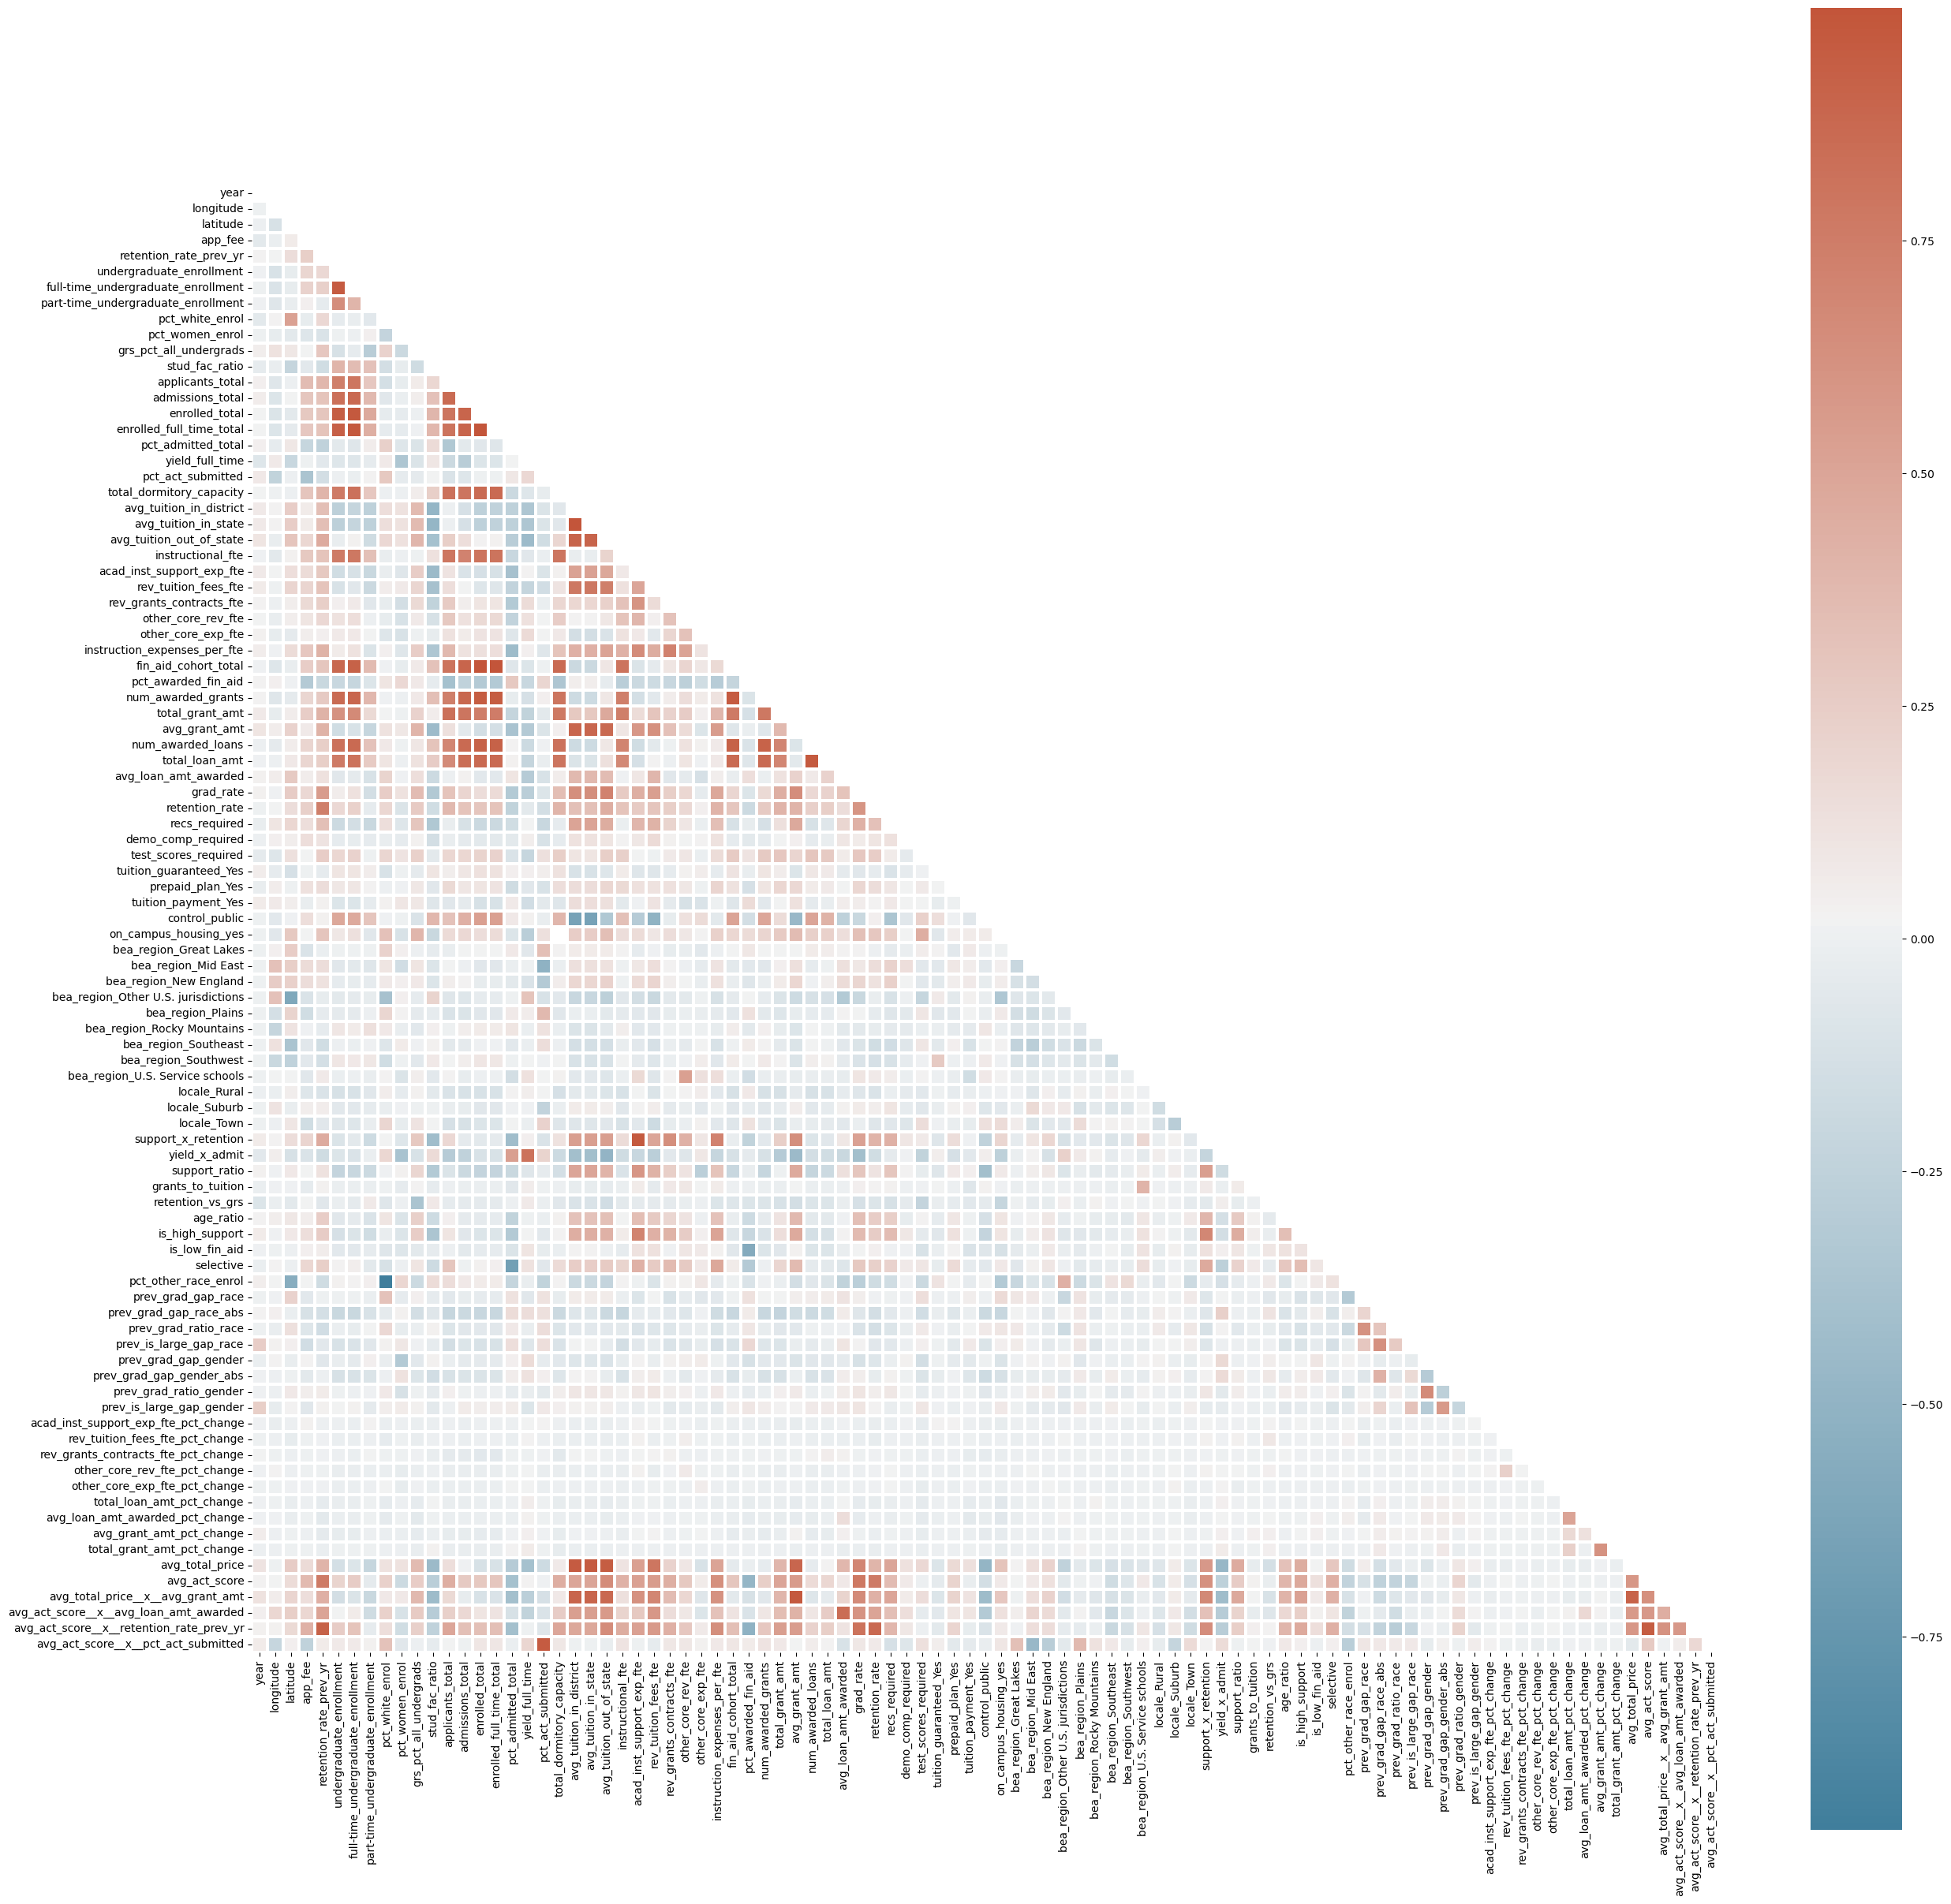

In [65]:
#creating correlation visualization using heatmap
mask = np.triu(np.ones_like(correlations_no_drop))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(30,30))
sns.heatmap(correlations_no_drop, 
            mask=mask,
            square=True, 
            linecolor='white',
            linewidths=1.5, 
            cmap=cmap)
plt.show()

In [66]:
#Columns chosen using VIF and correlation matrix.
#Although some features were highly correlated, they were still maintained due to their relevance
#for this study inorder to understand their interaction with other features. 
chosen_columns_via_vif_with_others = ['retention_rate_prev_yr', 
                                       'avg_tuition_out_of_state', 
                                       'avg_act_score', 'pct_white_enrol', 
                                       'avg_grant_amt', 'grs_pct_all_undergrads', 
                                       'acad_inst_support_exp_fte', 
                                       'total_dormitory_capacity', 'age_ratio', 
                                       'pct_women_enrol', 'longitude', 'stud_fac_ratio',
                                       'avg_loan_amt_awarded' , 'rev_grants_contracts_fte',
                                       'instructional_fte', 'total_loan_amt', 
                                       'avg_act_score__x__avg_loan_amt_awarded',
                                       'recs_required', 'latitude', 'pct_awarded_fin_aid', 
                                       'test_scores_required', 'year', 'avg_total_price',
                                       'prev_grad_gap_race', 'prev_grad_gap_race_abs',
                                       'prev_grad_ratio_race',
                                       'prev_grad_gap_gender', 'prev_grad_gap_gender_abs',
                                       'prev_grad_ratio_gender', 
                                       'grad_rate']

In [67]:
#(VIF + DOMAIN KNOWLEDGE) SELECTED COLUMNS DATASET
final_dataset = df_no_drop[chosen_columns_via_vif_with_others]

#Keep only the rows with at least 27 (90% of features) non-NA values.
final_dataset = final_dataset.dropna(thresh=27)

In [68]:
#correlation matrix for selected features
vif_corr = final_dataset.drop(['grad_rate'],axis=1).corr()

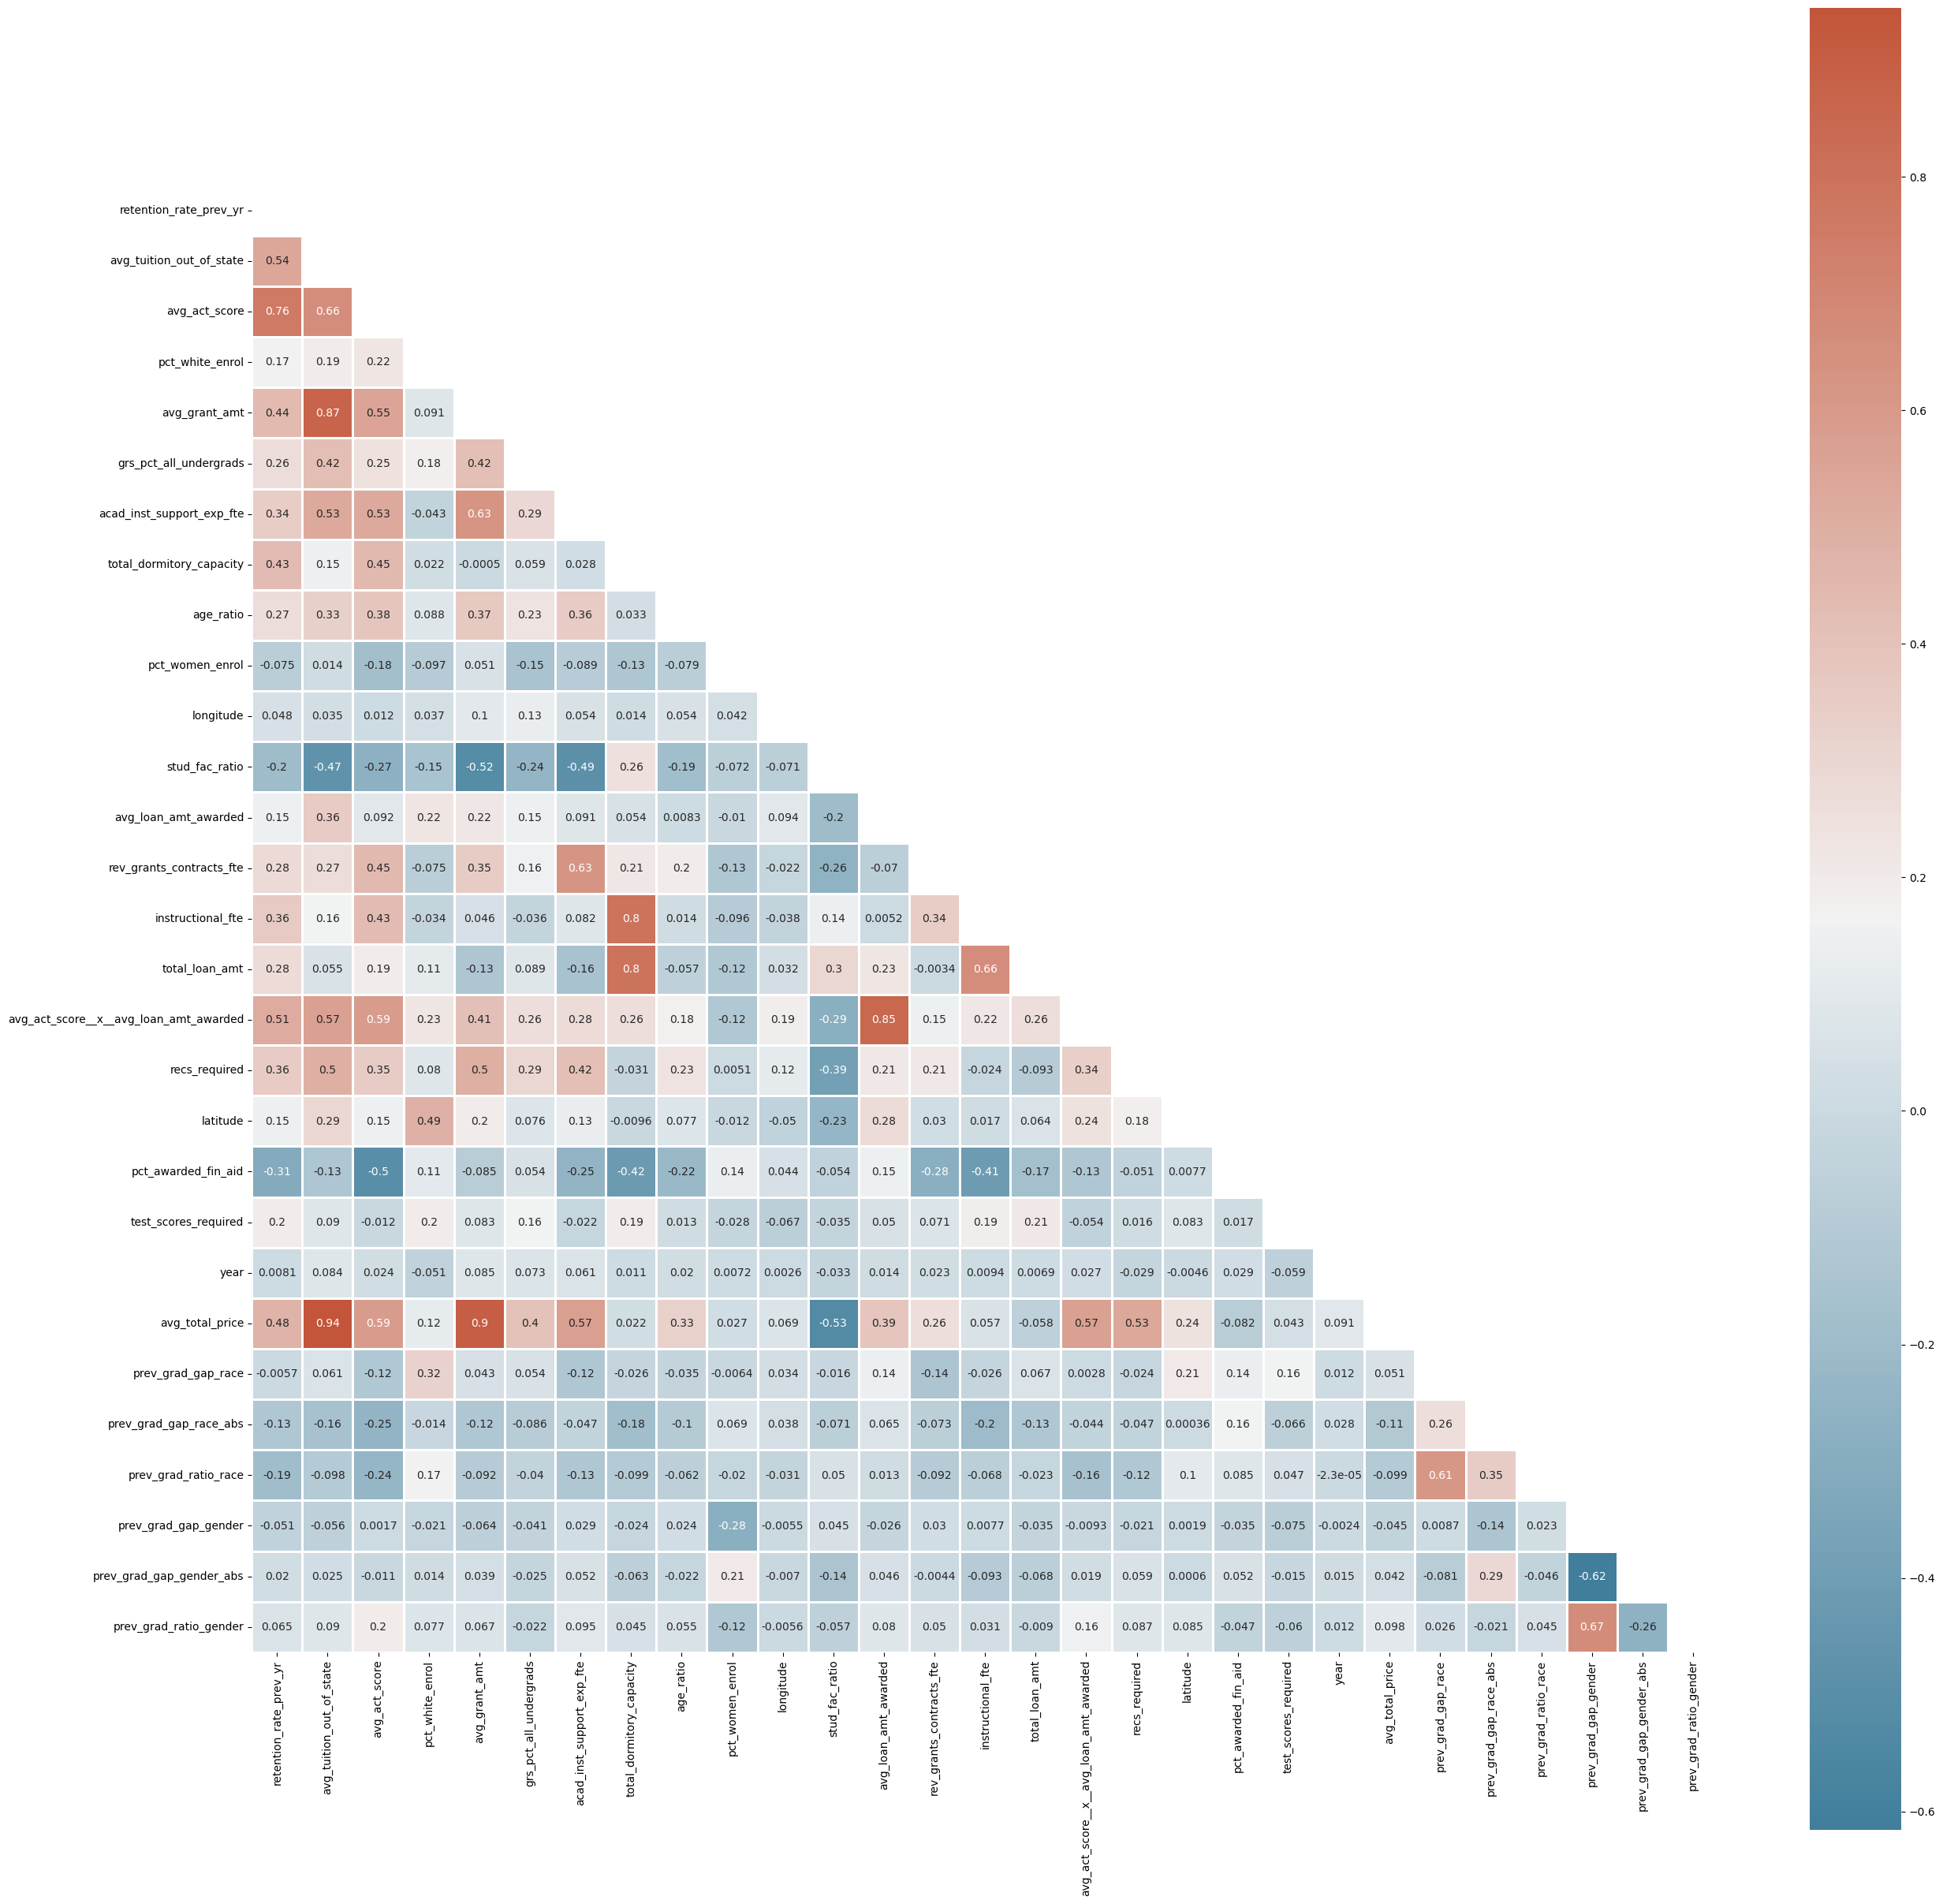

In [69]:
#creating correlation visualization using heatmap
mask = np.triu(np.ones_like(vif_corr))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize=(30,30))
sns.heatmap(vif_corr, 
            mask=mask,
            square=True, 
            linecolor='white',annot=True,
            linewidths=1, 
            cmap=cmap)
plt.show()

In [70]:
dist_of_years = final_dataset['year'].value_counts().sort_index()

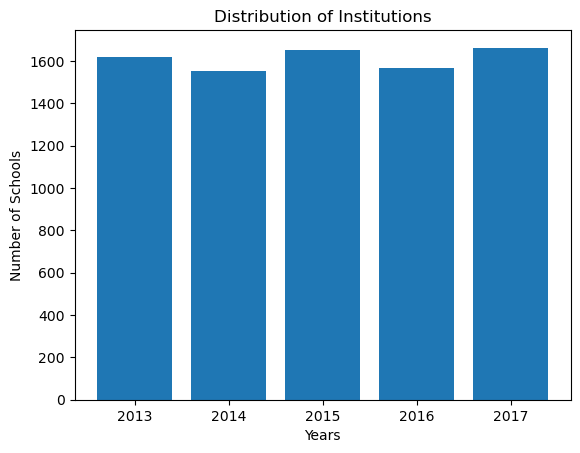

In [71]:
plt.bar(dist_of_years.index, dist_of_years.values)
plt.xlabel('Years')
plt.ylabel('Number of Schools')
plt.title('Distribution of Institutions')
plt.savefig('C:\\Users\\Lenovo\\Desktop\\DATA SCIENCE\\PAPER\\education paper\\Plots\\Distribution of Universities.png', 
            dpi=300, bbox_inches='tight')
plt.show()

In [72]:
#uncomment to download csv
#final_dataset.to_csv('C:\\Users\\Lenovo\\Desktop\\DATA SCIENCE\\PAPER\\education paper\\Data from IPEDS\\merged_dataset_for_imputation_and_ML.csv',index=False)